In [1]:
import os
import numpy as np
import pandas as pd

In [2]:
item_to_id_file = 'data/item_to_id.csv'
df_item = pd.read_csv(item_to_id_file, header=0, sep=',')
df_item.head()

,Item_name,Item_id
0,coffee,43
1,tea,23
2,juice,38
3,soda,9
4,sandwich loaves,39


In [3]:
df_item.shape

(48, 2)

In [4]:
df_item.replace(u'\xa0',u'', regex=True, inplace=True)

In [5]:

id_to_item = dict(zip(df_item['Item_id'], df_item['Item_name']))
print('====Id to Item dictionary: ', id_to_item)
item_to_id = dict(zip(df_item['Item_name'], df_item['Item_id']))
print('==============================')
print('===Item to Id dictionary: ', item_to_id)
print('==============================')
print('===Set of unique item ids: ')
#unique id
item_id_set = set(df_item['Item_id'])
print(item_id_set)
print('===Set of unique items: ')
item_set = set(df_item['Item_name'])
print(item_set)

====Id to Item dictionary:  {43: 'coffee', 23: 'tea', 38: 'juice', 9: 'soda', 39: 'sandwich loaves', 37: 'dinner rolls', 34: 'tortillas', 13: 'bagels', 28: 'canned vegetables', 26: 'spaghetti sauce', 41: 'ketchup', 21: 'cheeses', 14: 'eggs', 16: 'milk', 48: 'yogurt', 8: 'butter', 11: 'cereals', 30: 'flour', 1: 'sugar', 31: 'pasta', 5: 'waffles', 22: 'frozen vegetables', 36: 'ice cream', 6: 'poultry', 17: 'beef', 47: 'pork', 46: 'bananas', 40: 'berries', 25: 'cherries', 20: 'grapefruit', 32: 'apples', 44: 'broccoli', 10: 'carrots', 45: 'cauliflower', 42: 'cucumbers', 2: 'lettuce', 18: 'laundry detergent', 27: 'dishwashing', 24: 'paper towels', 33: 'toilet paper', 15: 'aluminum foil', 7: 'sandwich bags', 12: 'shampoo', 35: 'soap', 29: 'hand soap', 19: 'shaving cream', 4: 'baby items', 3: 'pet items'}
===Item to Id dictionary:  {'coffee': 43, 'tea': 23, 'juice': 38, 'soda': 9, 'sandwich loaves': 39, 'dinner rolls': 37, 'tortillas': 34, 'bagels': 13, 'canned vegetables': 28, 'spaghetti sau

In [6]:
purchase_file = 'data/purchase_history.csv'
df_purchase = pd.read_csv(purchase_file, header=0, sep=',')
print(df_purchase.shape)
df_purchase.head()

(39474, 2)


,user_id,id
0,222087,"27,26"
1,1343649,"6,47,17"
2,404134,"18,12,23,22,27,43,38,20,35,1"
3,1110200,"9,23,2,20,26,47,37"
4,224107,"31,18,5,13,1,21,48,16,26,2,44,32,20,37,42,35,4..."


In [7]:
print('build transcation array of item list in each transaction')
transactions = df_purchase['id'].str.split().values
transactions = [txt.split(",") for txt in df_purchase['id'].values]
print(len(transactions))
print('Example: transaction 300: ', transactions[300])

# Finding average number of transactions
sum_var = 0
for index,row in df_purchase.iterrows():
    sum_var = sum_var + len(row['id'])
average = float(sum_var)/float(39474)

print('Average Number Of Items In Each Transaction Is: ', average)


build transcation array of item list in each transaction
39474
Example: transaction 300:  ['9', '39', '26', '47', '6', '10', '2', '44', '42', '23', '40', '37']
Average Number Of Items In Each Transaction Is:  21.711252976642854


In [8]:
# displaying items in place of id's in the purchase history table
import pandas as pd

items = pd.read_csv('data/item_to_id.csv')



transactions = pd.read_csv('data/purchase_history.csv')

index = transactions.index.values
columns= ['user_id','id']

new_transactions = pd.DataFrame(index=index, columns=columns)
new_transactions= new_transactions.fillna(0)
new_transactions['id'] = new_transactions['id'].astype(object)

for i in range(0, len(new_transactions)):
    items_in_trans = transactions.loc[i,'id'].split(',')
    new_transactions.loc[i,'user_id'] = transactions.loc[i,'user_id']
    id = []
    for k in range(0,len(items_in_trans)):
        
        for index, row in items.iterrows():
            if int(row['Item_id']) == int(items_in_trans[k]):
                id.append(row['Item_name'])
        
     
    
    
        
                
    new_transactions.at[i, 'id'] = id          


print(new_transactions.head())
    


   user_id                                                 id
0   222087                    [dishwashing , spaghetti sauce]
1  1343649                              [poultry, pork, beef]
2   404134  [laundry detergent, shampoo, tea, frozen veget...
3  1110200  [soda, tea, lettuce, grapefruit, spaghetti sau...
4   224107  [pasta, laundry detergent, waffles, bagels, su...


# 1) Customers who bought the most items overall in his/her lifetime
Output: customer id

In [9]:
#Zenobia 


shopping_count = {}
for index, row in df_purchase.iterrows():
    items = row['id'].split(',')
    no_of_items = len(items)
    if shopping_count.get(row['user_id']) != None:
        value = shopping_count.get(row['user_id'])
        value = value+ no_of_items
        shopping_count[row['user_id']] = value
    else:
        shopping_count[row['user_id']] = no_of_items

initial_cust = next(iter(shopping_count))
best_customers = []
max_buy_count = shopping_count[initial_cust]
for key, value in shopping_count.items():
    if value >= max_buy_count:
        best_customers.append(key)
        max_buy_count = value
print("Customer who bought the most items overall in their lifetime:",best_customers)
    

Customer who bought the most items overall in their lifetime: [222087, 1343649, 404134, 224107, 31625, 599172, 397623, 367872, 269335]


# 2) For each item, the customer who bought that product the most
Output: customer ids

In [10]:
#Zenobia
items = list(item_id_set)
# print(items)
customers = list(set(df_purchase['user_id']))

matrix_items_cust = pd.DataFrame(index=items,columns = customers)
matrix_items_cust = matrix_items_cust.fillna(0)

for item in items:
    for index, row in df_purchase.iterrows():
        trans_items = df_purchase.loc[index]['id'].split(',')
        if str(item) in trans_items:
            customer = df_purchase.loc[index]['user_id']            
            matrix_items_cust.loc[item][customer] = matrix_items_cust.loc[item][customer]+ 1

            
            
           
            

            
# print(matrix_items_cust.head())



item_winner = pd.DataFrame(index = items, columns = ['customer_id'])
item_winner = item_winner.fillna(0)

columns = list(matrix_items_cust)
for index,row in matrix_items_cust.iterrows():
    count = row.values[0]
    for col in columns:
        if row[col]> count:
            count = row[col]
            item_winner.loc[index]['customer_id'] = col

        
print("For each item, the customer who bought that item the most is given below \n\n ", item_winner)
        

For each item, the customer who bought that item the most is given below 

      customer_id
1        540483
2        269335
3        154960
4          5289
5        397623
6        334664
7        811299
8       1054361
9       1310896
10      1485538
11       534745
12       791038
13       820788
14       395775
15       143741
16       920036
17      1089642
18       917199
19        31625
20      1100981
21       884172
22      1199670
23       920002
24      1077463
25        68282
26      1341188
27       956666
28       204624
29       394348
30       786951
31       289360
32      1310896
33      1425746
34      1341188
35       450482
36       269335
37       269335
38       889814
39       599172
40      1217810
41       133355
42       269335
43       996380
44       268767
45      1198106
46      1218645
47      1374100
48      1329628


In [11]:
#visualization
# What we are doing here essentially is market basket analysis.

#Creating a matrix of transactions against items. A value of 1 indicates that specific item is present in the 
# transaction(Market Basket)

item_names = list(df_item['Item_name'])
transaction_df = pd.DataFrame(index = new_transactions.index,columns = item_names)
transaction_df = transaction_df.fillna(0)


for index,row in new_transactions.iterrows():
    items = row['id']
    for item in items:
        transaction_df.loc[index][item] = 1
    
transaction_df

,coffee,tea,juice,soda,sandwich loaves,dinner rolls,tortillas,bagels,canned vegetables,spaghetti sauce,...,paper towels,toilet paper,aluminum foil,sandwich bags,shampoo,soap,hand soap,shaving cream,baby items,pet items
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
3,0,1,0,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,1,0,1,...,0,0,0,1,1,1,0,0,0,0
5,1,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
8,1,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

#Plotting the support of each product. Support = The number of transactions in which a product occurs.

product_support_dict = {}
for column in transaction_df.columns:
    product_support_dict[column] = sum(transaction_df[column]>0)
 
# visualise support
pd.Series(product_support_dict).plot(kind="bar",figsize=(10,10))





# take transaction_df and converting it into a matrix.
transaction_matrix = transaction_df.as_matrix()

# get number of rows and columns
rows, columns = transaction_matrix.shape

# Taking every product’s vector and multiplying it with every other products vector. 
# The final vector product of that multiplication indicates matches between products. 
# Those matches indicate pairs. Summation of the matches gives us the pair frequency. 
# The higher the number, the more frequent is the pair. The results are saved in new matrix (frequent_item_matrix).

# init new matrix
frequent_items_matrix = np.zeros((columns,columns))
# compare every product with every other
for this_column in range(0, columns-1):
    for next_column in range(this_column + 1, columns):
        # multiply product pair vectors
        product_vector = transaction_matrix[:,this_column] * transaction_matrix[:,next_column]
        # check the number of pair occurrences in baskets
        count_matches = sum((product_vector)>0)
        # save values to new matrix
        frequent_items_matrix[this_column,next_column] = count_matches
 


# plotting the frequent item matrix
def plot_matrix(matrix):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix, interpolation='nearest')
    fig.colorbar(cax)
    fig.show()
plot_matrix(frequent_items_matrix)





/Users/thyvo/anaconda3/envs/cmpe256_env/lib/python3.6/site-packages/ipykernel_launcher.py:18: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/Users/thyvo/anaconda3/envs/cmpe256_env/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


(48, 48)


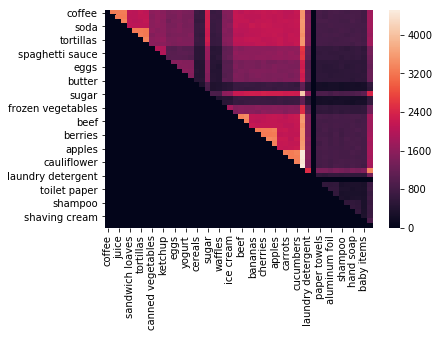

In [13]:
print(frequent_items_matrix.shape)
# combining resulting matrix (frequent_items_matrix) with product names to get some meaningful information.

frequent_items_df = pd.DataFrame(frequent_items_matrix, columns = transaction_df.columns.values, index = transaction_df.columns.values)
sns.heatmap(frequent_items_df)

# As seen in the graph, items like frequency of the pairs (carrots, laundry detergent), (cucumbers, laundry detergent) is high

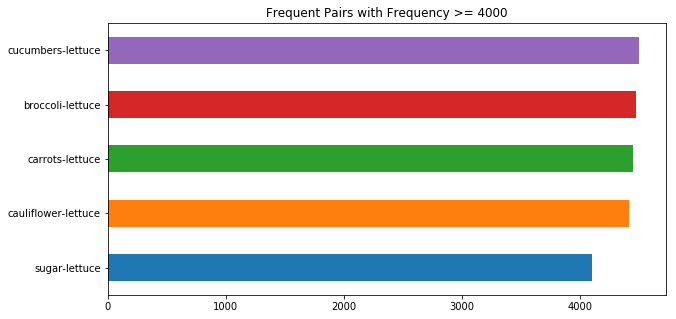

In [14]:
from collections import OrderedDict
import matplotlib as mpl
get_ipython().magic(u'matplotlib inline')
mpl.rcParams['figure.figsize'] = (10.0, 5)

product_names = transaction_df.columns.values
# The code below extracts frequent pairs into new dictionary with pair as key and frequency as value.
# Extract product pairs with minimum frequency(threshold) of basket occurrences
def extract_pairs(threshold):
    output = {}
    # select indexes with larger or equal n
    matrix_coord_list = np.where(frequent_items_matrix >= threshold)
    # take values
    row_coords = matrix_coord_list[0]
    column_coords = matrix_coord_list[1]
    # generate pairs
    for index, value in enumerate(row_coords):
        #print index
        row = row_coords[index]
        column = column_coords[index]
        # get product names
        first_product = product_names[row]
        second_product = product_names[column]
        # number of basket matches
        matches = frequent_items_matrix[row,column]
        # put key values into dict
        output[first_product+"-"+second_product] = matches
    
    # return sorted dict (sorting in order of largest frequency to smallest)
    sorted_output = OrderedDict(sorted(output.items(), key=lambda x: x[1]))
    return sorted_output
    
# plot pairs with minimum frequency of 4000 basket matches
min_frequency = 4000
ax = pd.Series(extract_pairs(min_frequency)).plot(kind="barh",title="Frequent Pairs with Frequency >= " + str(min_frequency))

# Hence the graph below shows that the cucumber & lettuce are bought together the largest number of times, followed by broccoloi and 
# lettuce et al.


# 3) Cluster items based on user co-purchase history
Create clusters of products that have the highest probability of being bought together. The goal of this is to replace the old/manually created categories with these new ones. Each item can belong to just one cluster.

### 3.1 Frequent Pattern Mining (i.e. Association Rule Mining) - FPGrowth or Apriori algorithms
This approach is suggested by our professor

Idea: Find frequent items bought together, **plot the rules to see the network of items**, propose the categories

**Read thee blogs to get the idea:** https://www.analyticsvidhya.com/blog/2017/08/mining-frequent-items-using-apriori-algorithm/
http://rstatistics.net/association-mining-with-r/

What is FPGrowth: https://en.wikibooks.org/wiki/Data_Mining_Algorithms_In_R/Frequent_Pattern_Mining/The_FP-Growth_Algorithm

What is Apriori: https://www.hackerearth.com/blog/machine-learning/beginners-tutorial-apriori-algorithm-data-mining-r-implementation/

FPGrowth vs Apriori: https://www.quora.com/What-is-the-difference-between-FPgrowth-and-Apriori-algorithms-in-terms-of-results

#### 3.1.1 FPGrowth

Library:https://pypi.org/project/pyfpgrowth/

Document: https://fp-growth.readthedocs.io/en/latest/readme.html#getting-started

Trivia: building the rules takes a lot of time

In [2]:
import pyfpgrowth
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from apyori import apriori
import time
import re
import networkx as nx
import pickle 

# reading from csv file with the item names for each transaction -> done to speed up the run time
df = pd.read_csv("tran_itemname.csv", sep='\t', names=["user_id","id"])
for i in range(0, len(df['id']) - 1 ):
    if u'\\xc2\\xa0' in  df['id'][i]:
        df['id'][i]  = df['id'][i].replace(u'\\xc2\\xa0', u'')

# sampling
df = df.groupby('id', group_keys=False).apply(lambda x: x.sample(min(len(x), 2)))

# create a list with all the transactions as sublists
new_transactions = df
item_transactions = new_transactions['id'].str.split().values
item_transactions = [txt.split(",") for txt in new_transactions['id'].values]
del item_transactions[0] # remove 'id'
#print(new_transactions.head())

# sampling of the data - stratified grouped by user_id
no_users = new_transactions['user_id'].nunique()
n = new_transactions.groupby('user_id').apply(lambda x: x.sample(frac = 0.11))
#print("--------n--------")
#print(n.head())
print("The number of transactions in the sample: %s" %len(n))

transactions = n['id'].str.split().values
transactions = [txt.split(",") for txt in n['id'].values]
#print(transactions[1])
print("Generating patterns")
patterns = pyfpgrowth.find_frequent_patterns(transactions, 3) # 3 represents min # of appearance
print("Generating Rules")
rules = pyfpgrowth.generate_association_rules(patterns, 0.85)
print("Total number of rules generated: %s" % len(rules))

print("Associations:")
for key,value in rules.items():
    print("Items: %s -> Association: %s" % (str(key), str(value)))

result = {}
replaceValues = []
def formatString(value):
    value = str(value)
    value = value.strip().replace("'","")
    value = value.strip().replace("[","")
    value = value.strip().replace("]","")
    return value
    #return value.strip().replace("'","")

for field, values in rules.items():
    newFields = []
    for value in field:
        newFields.append(formatString(value))
    value = [formatString(values[0][0])]
    result[tuple(newFields)] = tuple(value)



#print(result)
# store result in file
with open("fpgrowth.txt", "wb") as myFile:
    pickle.dump(result, myFile)

The number of transactions in the sample: 129
Generating patterns
Generating Rules
Total number of rules generated: 278
Associations:
Items: ("['canned vegetables'",) -> Association: ((" 'lettuce'",), 1.0)
Items: (" 'toilet paper'",) -> Association: ((" 'lettuce'", " 'tortillas'"), 1.0)
Items: (" 'lettuce'", " 'toilet paper'") -> Association: ((" 'tortillas'",), 1.0)
Items: (" 'toilet paper'", " 'tortillas'") -> Association: ((" 'lettuce'",), 1.0)
Items: (" 'laundry detergent']", " 'lettuce'") -> Association: ((" 'sugar'",), 1.0)
Items: (" 'laundry detergent']", " 'sugar'") -> Association: ((" 'lettuce'",), 1.0)
Items: (" 'coffee'", " 'juice']") -> Association: ((" 'soda'",), 1.0)
Items: (" 'juice']", " 'soda'") -> Association: ((" 'coffee'",), 1.0)
Items: (" 'paper towels'", "['dinner rolls'") -> Association: ((" 'cucumbers'",), 1.0)
Items: (" 'carrots'", "['dinner rolls'") -> Association: ((" 'cucumbers'",), 1.0)
Items: ("['pet items'",) -> Association: ((" 'lettuce'",), 1.0)
Items: 

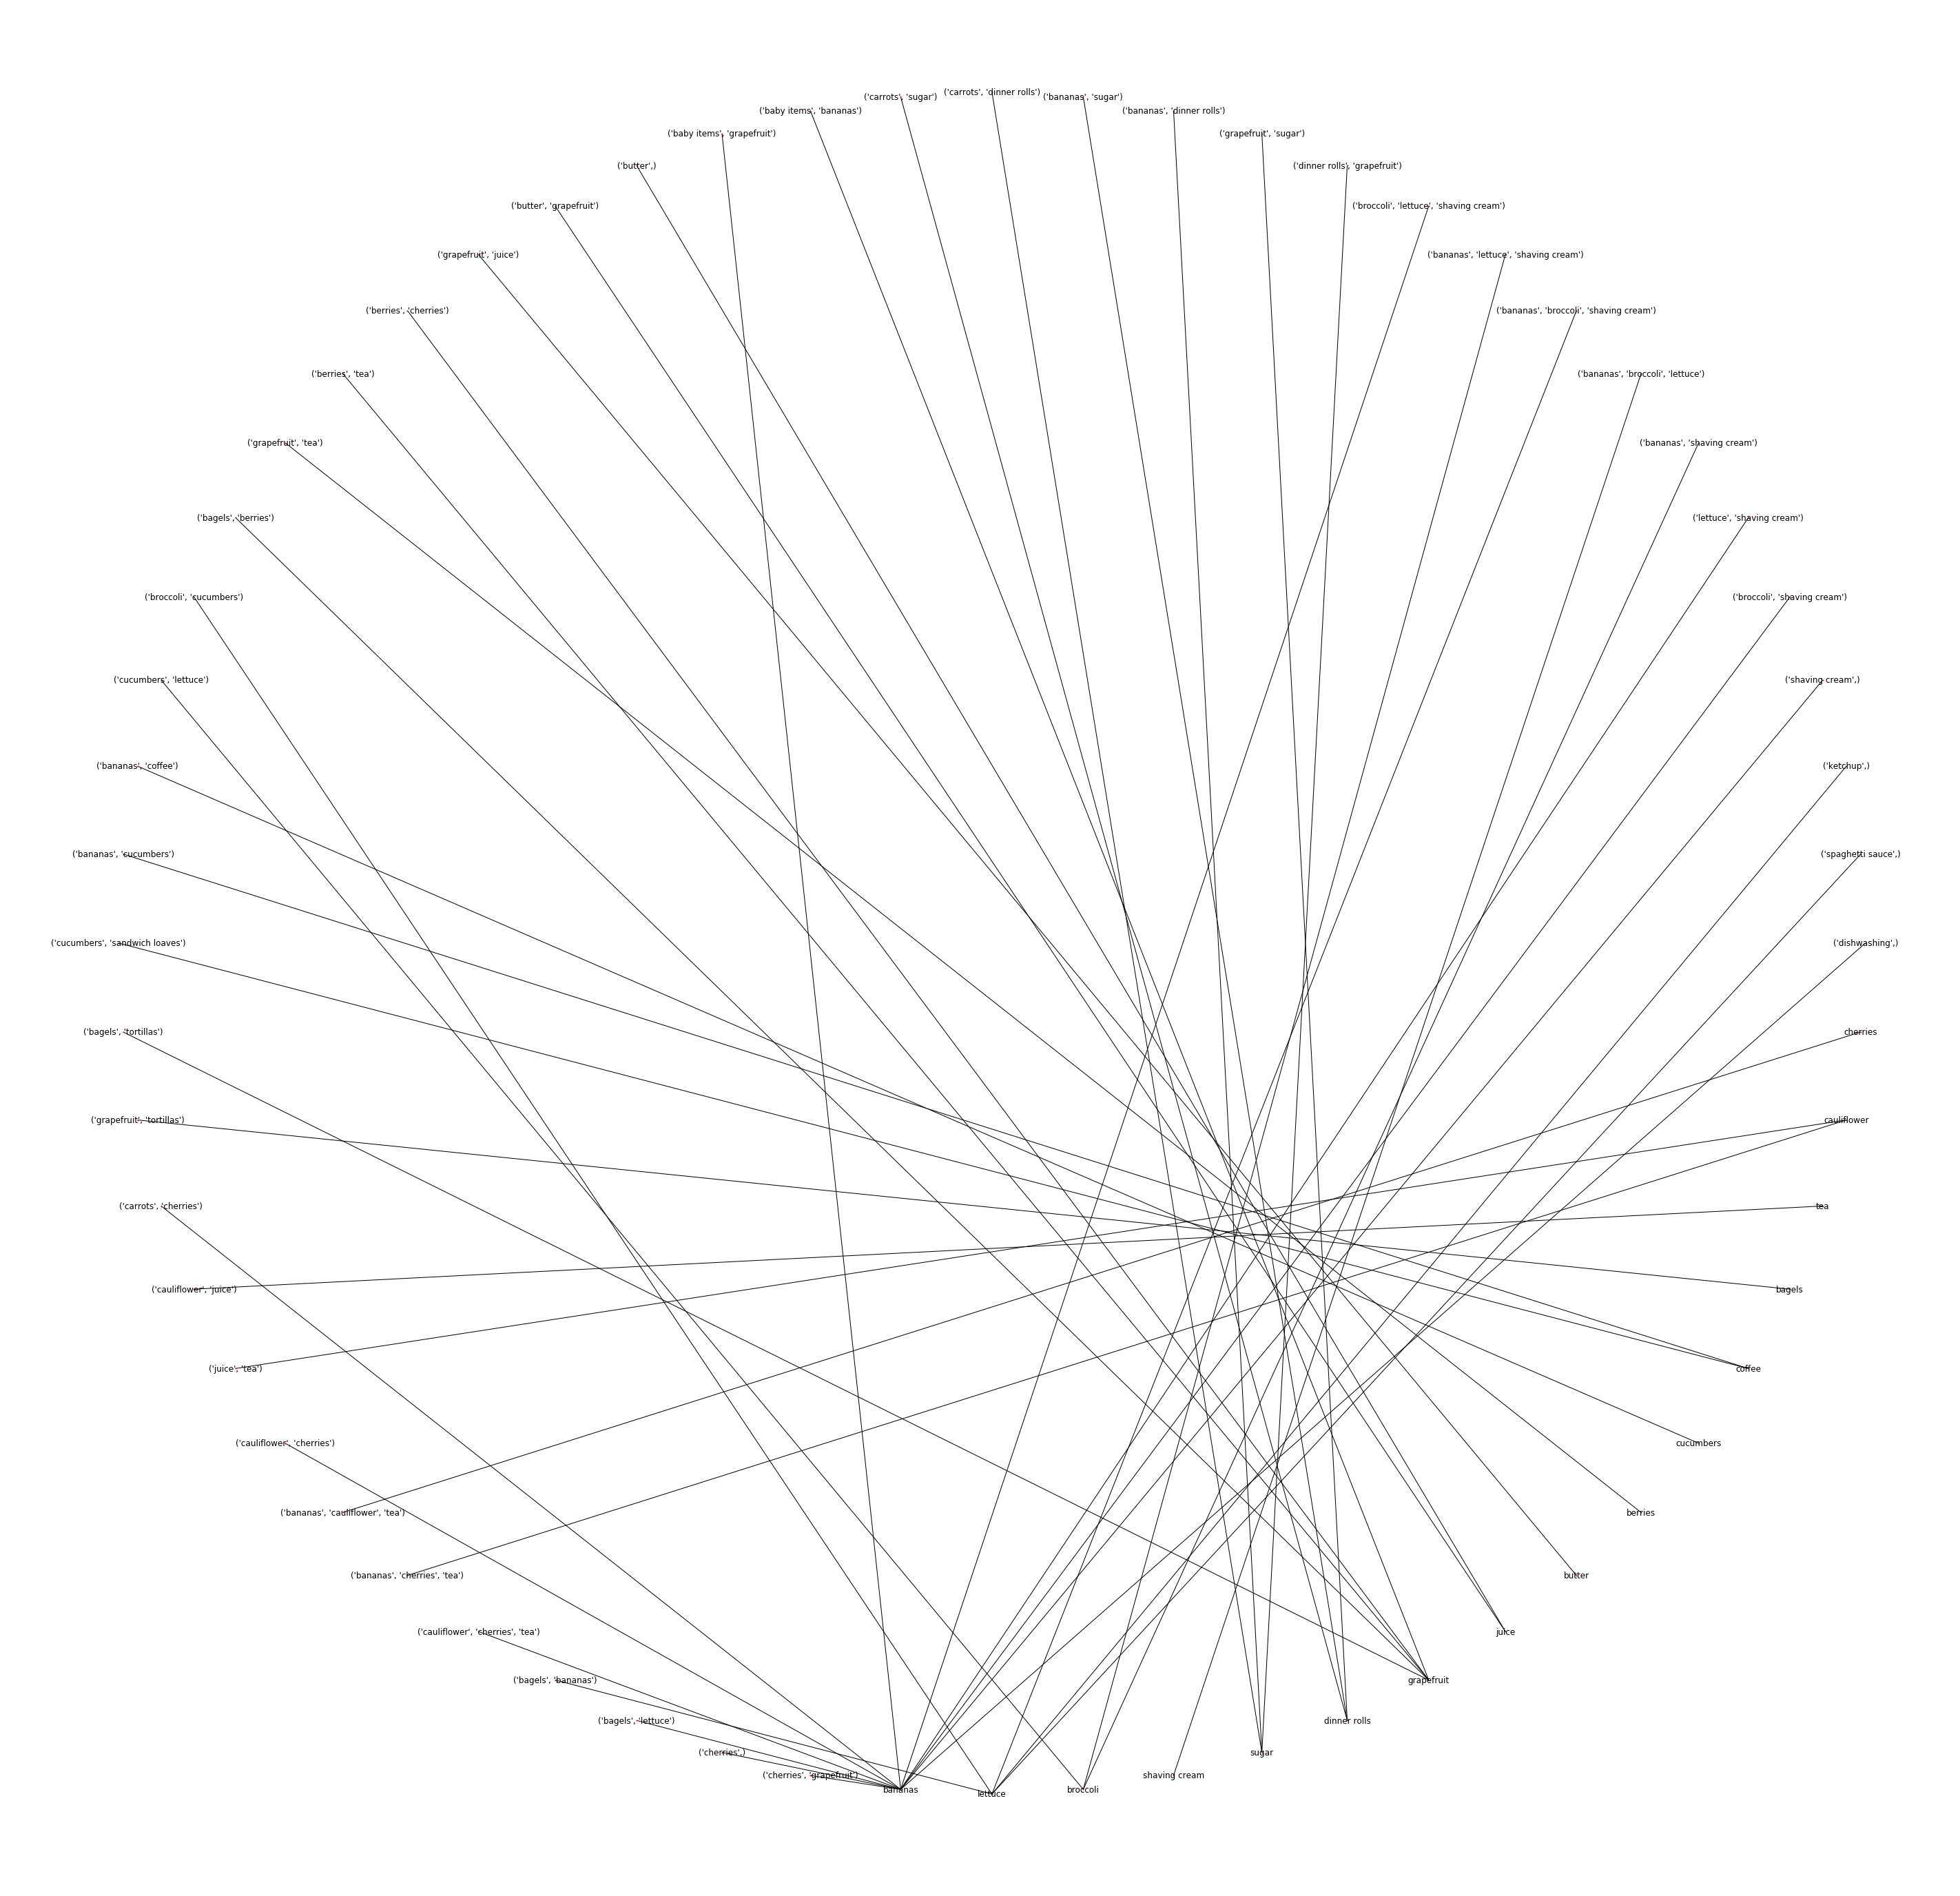

In [16]:
import pyfpgrowth
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from apyori import apriori
import time
import re
import networkx as nx
import pickle 


with open("fpgrowth.txt", "rb") as myFile:
    result = pickle.load(myFile)

G = nx.Graph(result)
G.add_nodes_from(result.keys())

fig, axs = plt.subplots(1,1, figsize=(50,50))
pos = nx.circular_layout(G)
nx.draw(G,axis=axs, pos=pos, node_size=1, with_labels=True)
#plt.figure(2,figsize=(33, 33))

plt.show()

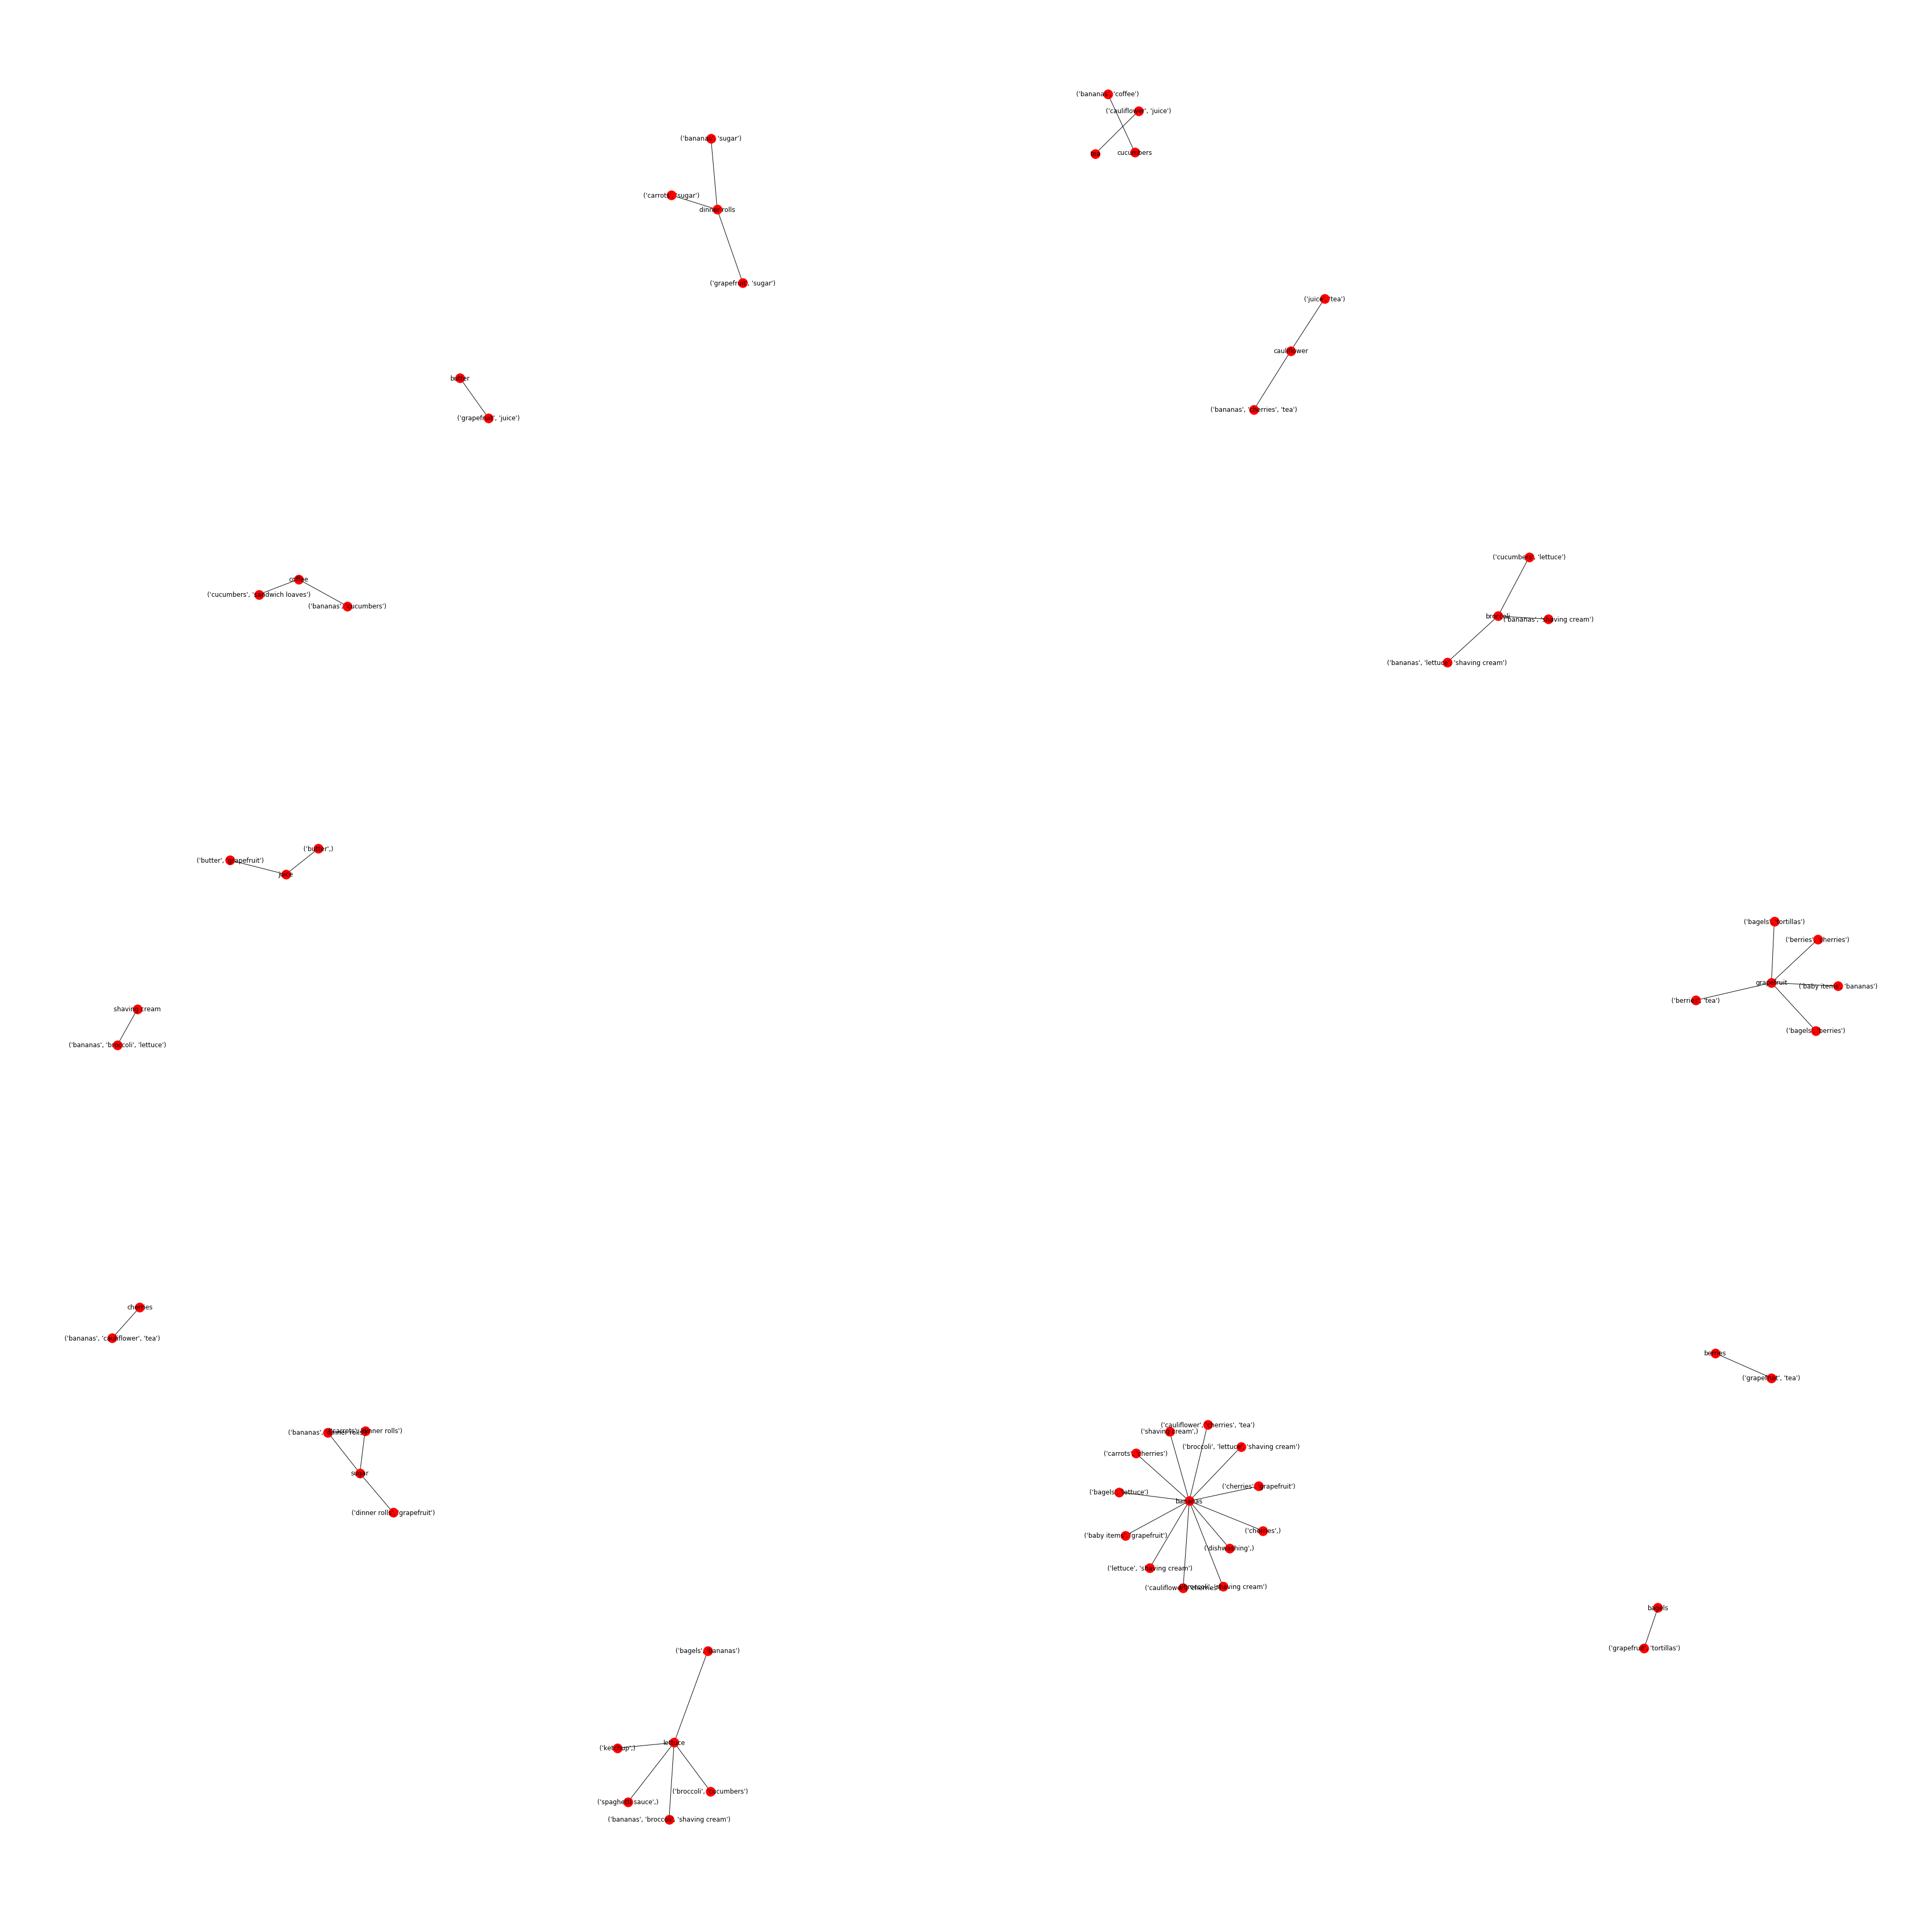

In [17]:
with open("fpgrowth.txt", "rb") as myFile:
    result = pickle.load(myFile)

G = nx.Graph(result)
G.add_nodes_from(result.keys())
plt.figure(2,figsize=(50, 50))
nx.draw(G, with_labels=True)
plt.show()

-----Communities-----


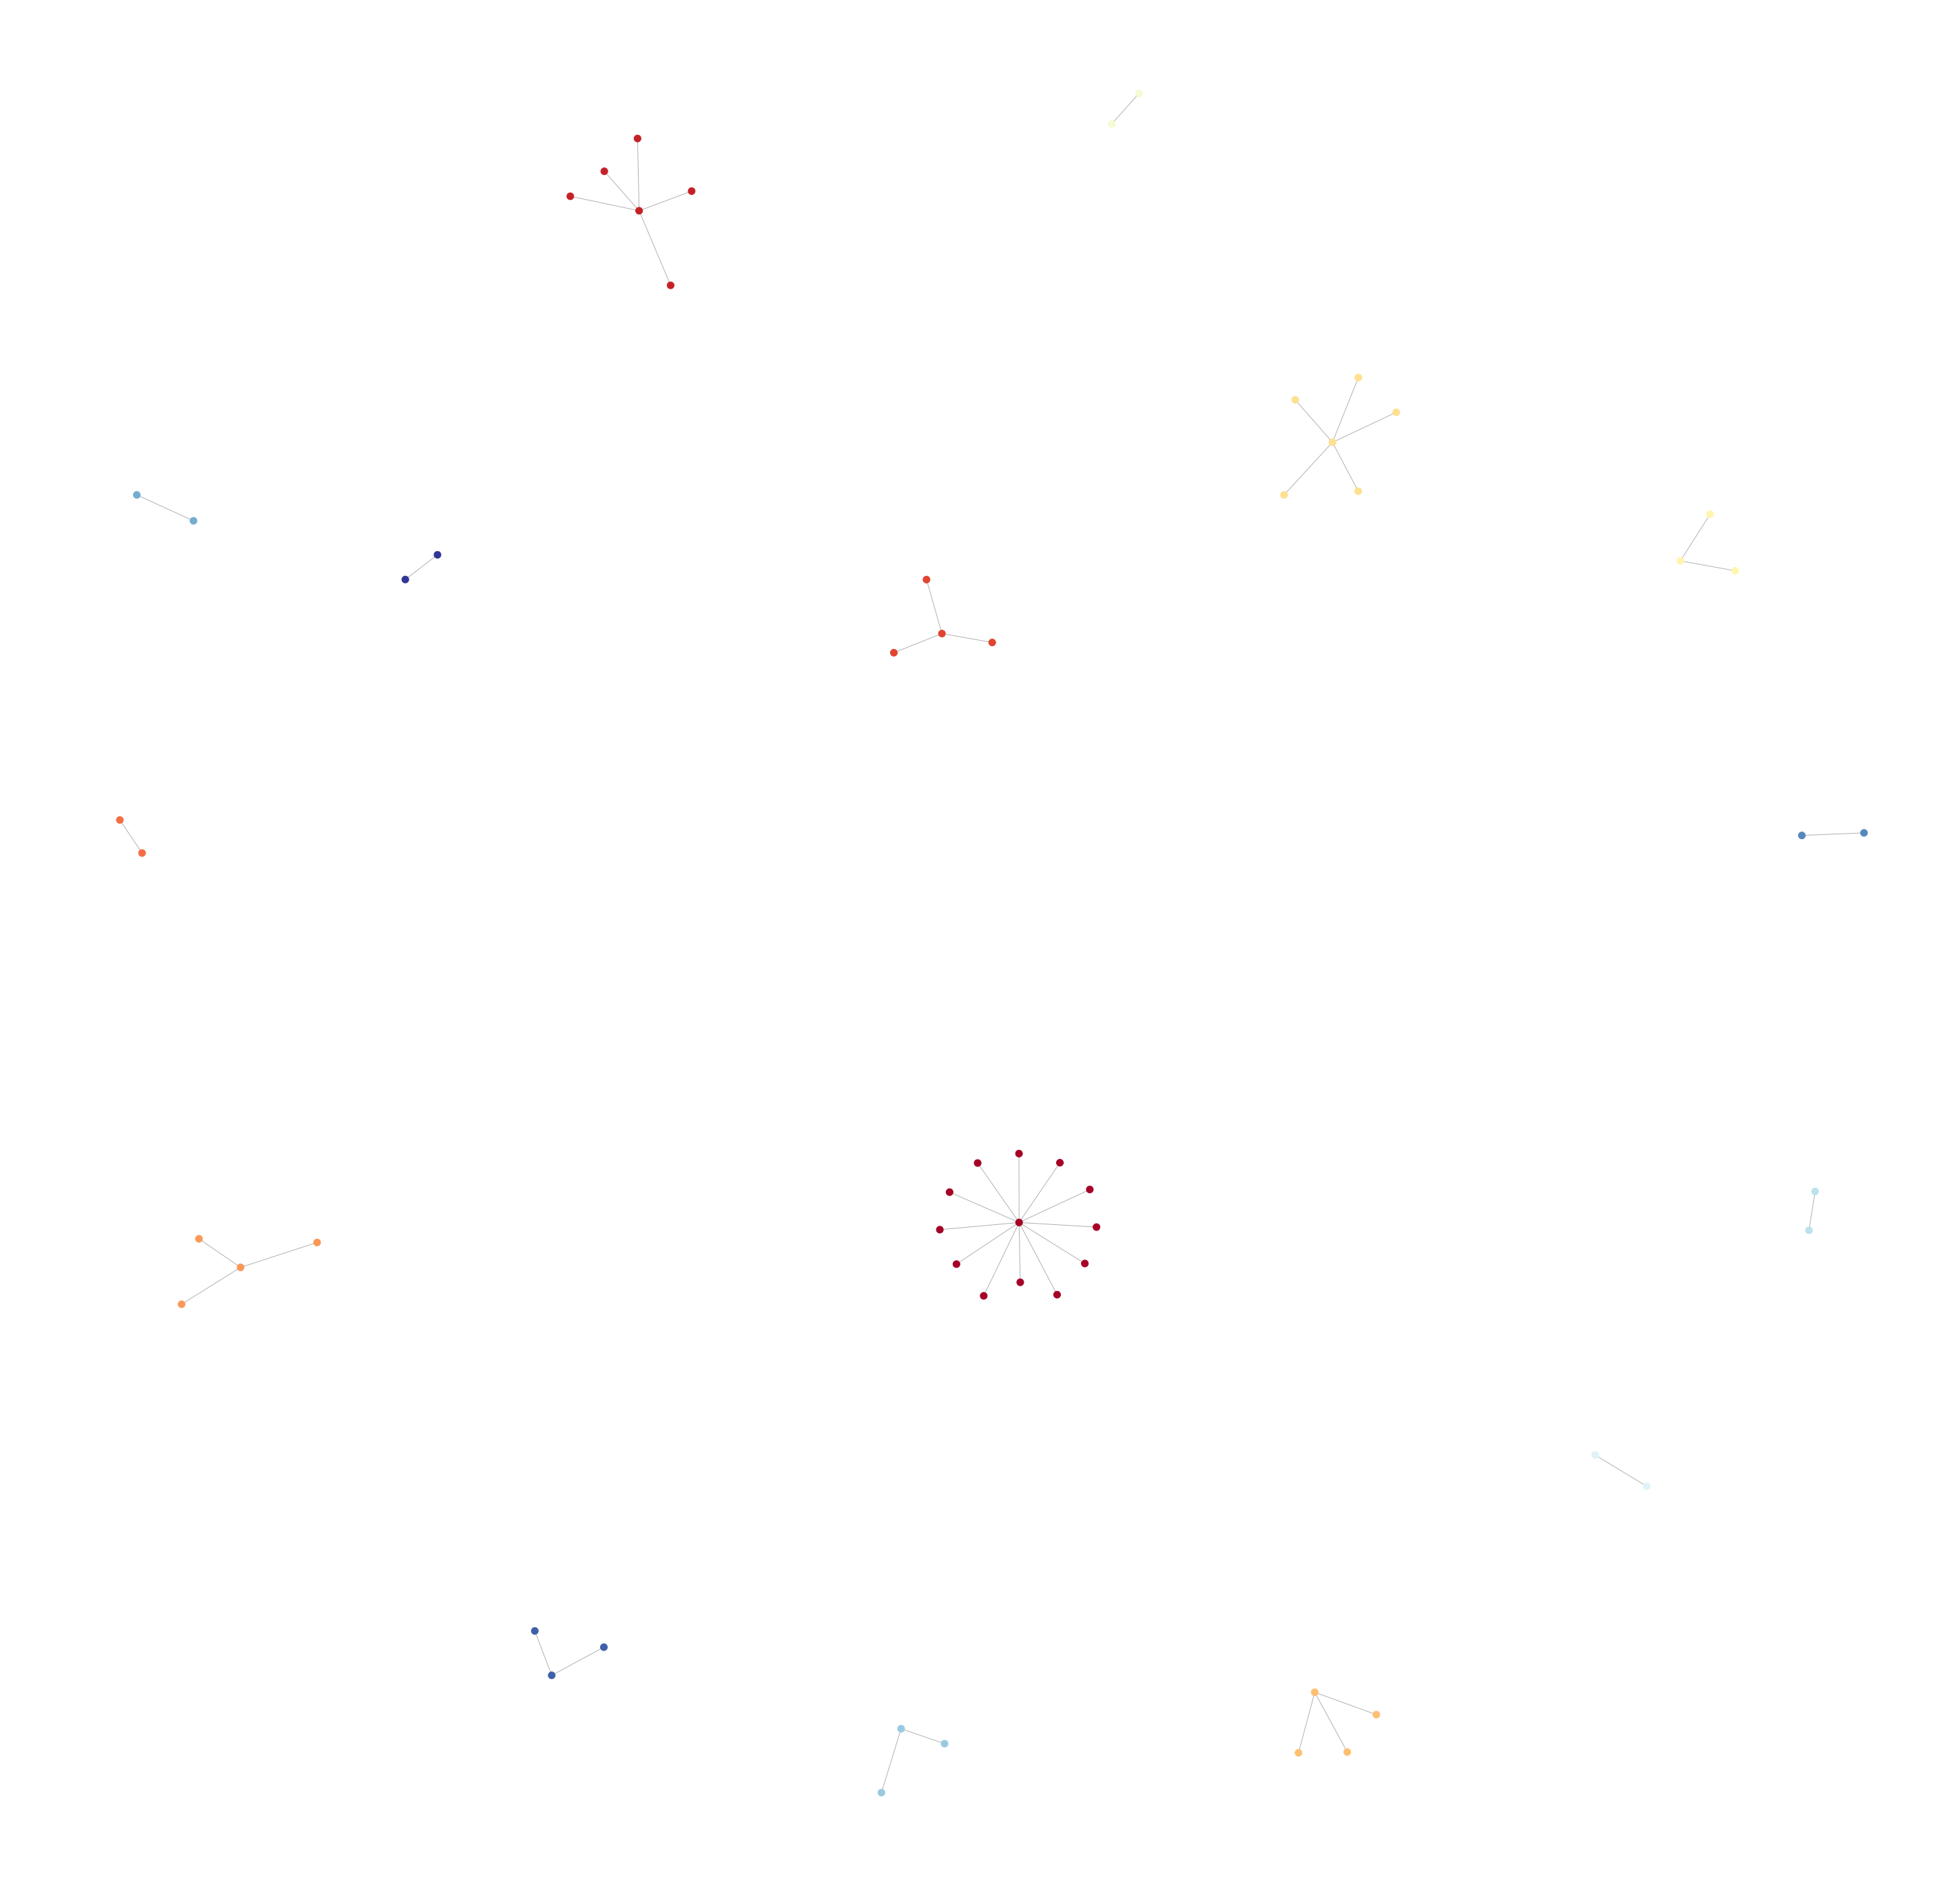

modularity: 0.8760330578512396


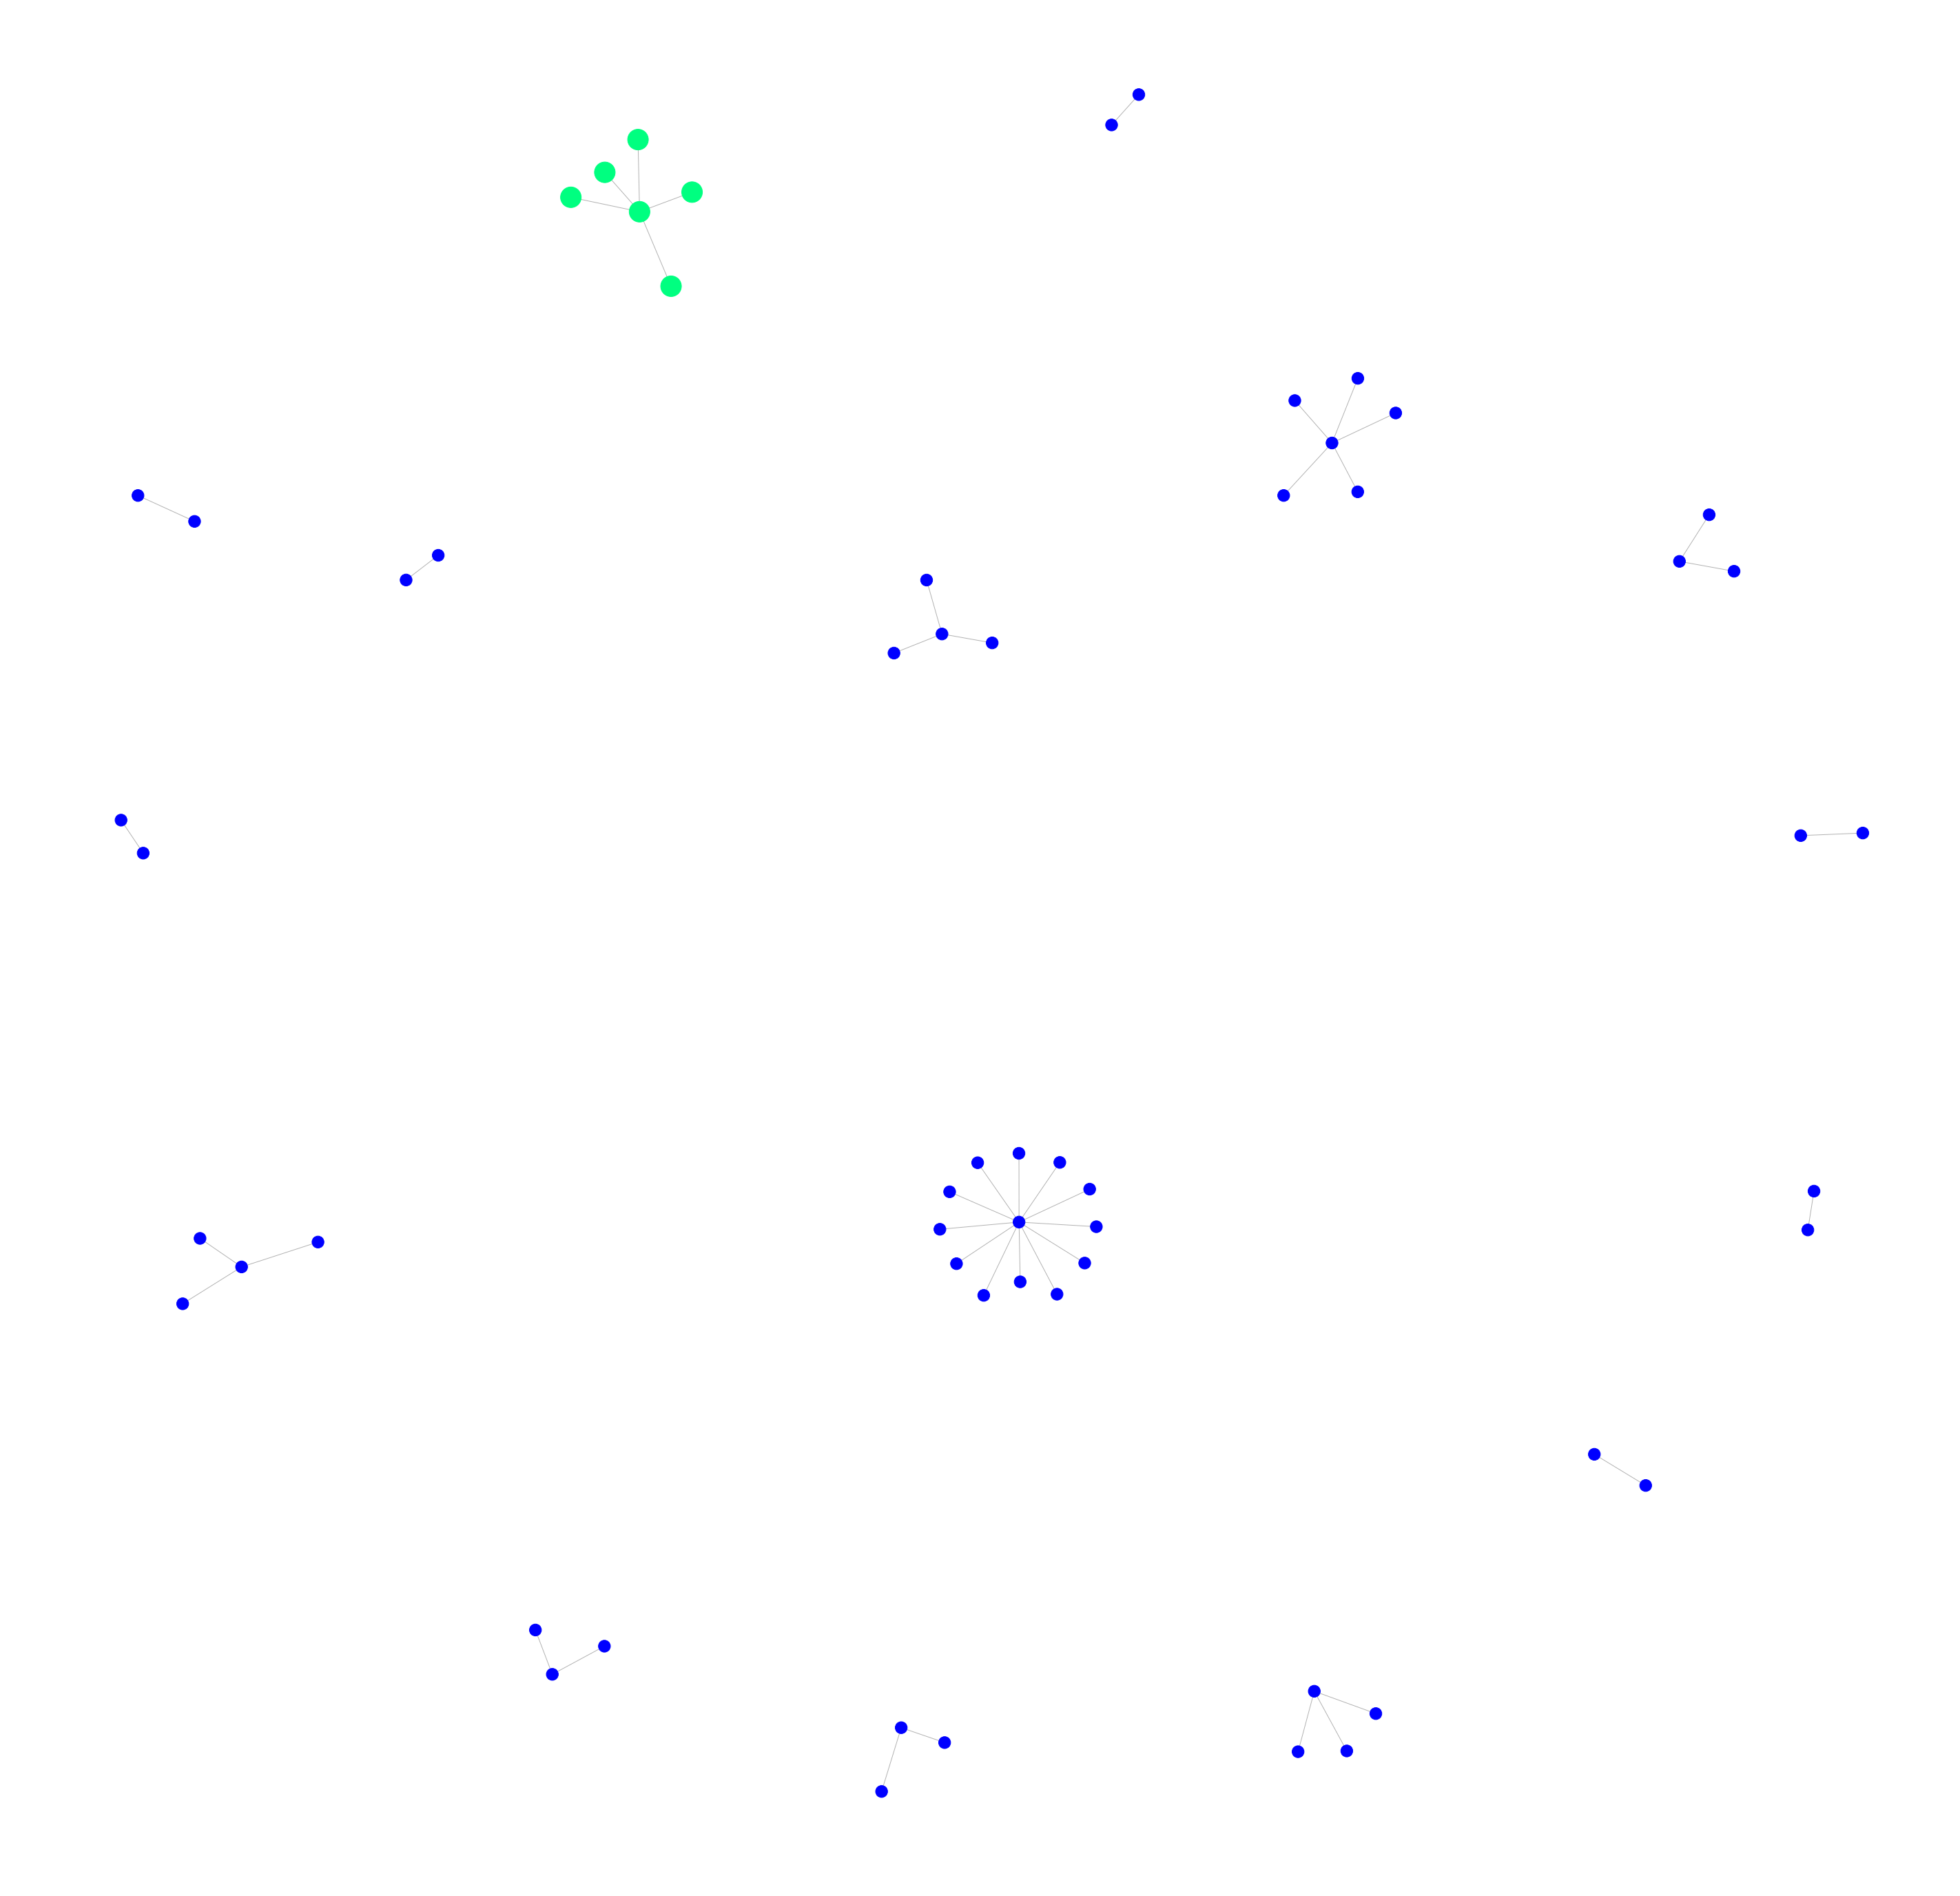

In [18]:
import pyfpgrowth
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from apyori import apriori
import time
import re
import networkx as nx
import pickle 
#import community
import matplotlib.pyplot as plt
import community.community_louvain as community

with open("fpgrowth.txt", "rb") as myFile:
    result = pickle.load(myFile)

G = nx.Graph(result)
G.add_nodes_from(result.keys())
partition = community.best_partition(G)


#
print("-----Communities-----")
partition = community.best_partition(G)  

pos = nx.spring_layout(G)  
plt.figure(figsize=(50, 50))
plt.axis('off')
nx.draw_networkx_nodes(G, pos, node_size=100, cmap=plt.cm.RdYlBu, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.3)
plt.show(G)

mod = community.modularity(partition,G)
print("modularity:", mod)

node_size = []

# first community against the others
for node, community in partition.items():
    if community == 1:
        node_size.append(900)
    else:
        partition[node] = 0  # I put all the other communities in one communitiy
        node_size.append(300)

plt.figure(figsize=(50, 50))
plt.axis('off')
nodes = nx.draw_networkx_nodes(G, pos, node_size=node_size, cmap=plt.cm.winter, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.3)
plt.show(G)



In [19]:
import pyfpgrowth
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from apyori import apriori
import time
import re
import networkx as nx
import pickle 

with open("fpgrowth.txt", "rb") as myFile:
    result = pickle.load(myFile)

G = nx.Graph(result)
G.add_nodes_from(result.keys())


largest_cc = max(nx.connected_components(G), key=len)
#print(len(largest_cc))

print("The Recommended Clusters based off of connected components:")
for item in largest_cc:
    print (item)



The Recommended Clusters based off of connected components:
('shaving cream',)
('cauliflower', 'cherries')
('carrots', 'cherries')
('cherries',)
('bagels', 'lettuce')
bananas
('broccoli', 'lettuce', 'shaving cream')
('cherries', 'grapefruit')
('baby items', 'grapefruit')
('cauliflower', 'cherries', 'tea')
('lettuce', 'shaving cream')
('dishwashing',)
('broccoli', 'shaving cream')


In [20]:
import pyfpgrowth
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from apyori import apriori
import time
import re
import networkx as nx
import pickle 


with open("fpgrowth.txt", "rb") as myFile:
    result = pickle.load(myFile)
G = nx.Graph(result)
G.add_nodes_from(result.keys())
print('-----Clustering Coefficients------')
print(nx.clustering(G))

-----Clustering Coefficients------
{('dishwashing',): 0, ('spaghetti sauce',): 0, ('ketchup',): 0, ('shaving cream',): 0, ('broccoli', 'shaving cream'): 0, ('lettuce', 'shaving cream'): 0, ('bananas', 'shaving cream'): 0, ('bananas', 'broccoli', 'lettuce'): 0, ('bananas', 'broccoli', 'shaving cream'): 0, ('bananas', 'lettuce', 'shaving cream'): 0, ('broccoli', 'lettuce', 'shaving cream'): 0, ('dinner rolls', 'grapefruit'): 0, ('grapefruit', 'sugar'): 0, ('bananas', 'dinner rolls'): 0, ('bananas', 'sugar'): 0, ('carrots', 'dinner rolls'): 0, ('carrots', 'sugar'): 0, ('baby items', 'bananas'): 0, ('baby items', 'grapefruit'): 0, ('butter',): 0, ('butter', 'grapefruit'): 0, ('grapefruit', 'juice'): 0, ('berries', 'cherries'): 0, ('berries', 'tea'): 0, ('grapefruit', 'tea'): 0, ('bagels', 'berries'): 0, ('broccoli', 'cucumbers'): 0, ('cucumbers', 'lettuce'): 0, ('bananas', 'coffee'): 0, ('bananas', 'cucumbers'): 0, ('cucumbers', 'sandwich loaves'): 0, ('bagels', 'tortillas'): 0, ('grapefru

In [21]:
import time
import re
import networkx as nx
import pickle 
import community 

with open("fpgrowth.txt", "rb") as myFile:
    result = pickle.load(myFile)
G = nx.Graph(result)
G.add_nodes_from(result.keys())

print("--------Clustering based off of Communities------")
communities_generator = nx.algorithms.community.centrality.girvan_newman(G)
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)
print(next_level_communities)
x = (sorted(map(sorted, next_level_communities)))
print(x)

--------Clustering based off of Communities------
({('dishwashing',)}, {('spaghetti sauce',), ('ketchup',), ('bananas', 'broccoli', 'shaving cream'), ('bagels', 'bananas'), 'lettuce', ('broccoli', 'cucumbers')}, {('shaving cream',)}, {('cauliflower', 'cherries'), ('carrots', 'cherries'), ('cherries',), ('bagels', 'lettuce'), 'bananas', ('broccoli', 'lettuce', 'shaving cream'), ('cherries', 'grapefruit'), ('baby items', 'grapefruit'), ('cauliflower', 'cherries', 'tea'), ('lettuce', 'shaving cream'), ('broccoli', 'shaving cream')}, {('cucumbers', 'lettuce'), ('bananas', 'shaving cream'), ('bananas', 'lettuce', 'shaving cream'), 'broccoli'}, {('bananas', 'broccoli', 'lettuce'), 'shaving cream'}, {('dinner rolls', 'grapefruit'), ('carrots', 'dinner rolls'), 'sugar', ('bananas', 'dinner rolls')}, {('bananas', 'sugar'), ('carrots', 'sugar'), 'dinner rolls', ('grapefruit', 'sugar')}, {('berries', 'tea'), 'grapefruit', ('bagels', 'berries'), ('bagels', 'tortillas'), ('baby items', 'bananas'), 

#### 3.1.2 Apriori

Library: https://pypi.org/project/apyori/

Example of using this library: https://stackabuse.com/association-rule-mining-via-apriori-algorithm-in-python/

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from apyori import apriori
import networkx as nx
import re
import pickle 

# reading from csv file with the item names for each transaction -> done to speed up the run time
df = pd.read_csv("tran_itemname.csv", sep='\t', names=["user_id","id"])
for i in range(0, len(df['id']) - 1 ):
    if u'\\xc2\\xa0' in  df['id'][i]:
        df['id'][i]  = df['id'][i].replace(u'\\xc2\\xa0', u'')


# create a list with all the transactions as sublists
new_transactions = df
item_transactions = new_transactions['id'].str.split().values
item_transactions = [txt.split(",") for txt in new_transactions['id'].values]
del item_transactions[0] # remove 'id'

print("Generating Association Rules")
#association_rules = apriori(item_transactions, min_support=0.0045, min_confidence=0.50, min_lift=1, min_length=2) # -> working
association_rules = apriori(item_transactions, min_support=0.00045, min_confidence=0.65, min_lift=1, min_length=2) #-> more rules
association_results = list(association_rules)
print('Number of rules generated: %s' % len(association_results))


association = []
trans = []
for item in association_results:
    pair = item[0]
    items = [x for x in pair]
    pattern = items[0]
    for i in range(0, len(items)):
        association.append(items[i])
    trans.append(association)
    association.pop(0)
    association = []

print("The rules generated:")
for item in association_results:
    pair = item[0]
    items = [x for x in pair]
    items_str = ",".join(items)
    print("Rule: %s" % items_str)
    print("Support: " + str(item[1]))
    print("Confidence: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print("=====================================")





Generating Association Rules
Number of rules generated: 1841
The rules generated:
Rule:  'tortillas', 'sandwich loaves', 'aluminum foil',['dinner rolls'
Support: 0.000455996352029
Confidence: 0.692307692308
Lift: 4.08859273581
Rule:  'cherries', 'apples', 'dishwashing', 'bananas']
Support: 0.000582662005371
Confidence: 0.657142857143
Lift: 3.7453157873
Rule: ['bananas', 'apples', 'berries', 'pet items'
Support: 0.000658661397375
Confidence: 0.684210526316
Lift: 3.90014820445
Rule:  'lettuce', 'apples', 'sugar'], 'broccoli'
Support: 0.000607995136039
Confidence: 0.685714285714
Lift: 2.50466232204
Rule:  'lettuce', 'apples', 'sugar'], 'carrots'
Support: 0.000683994528044
Confidence: 0.658536585366
Lift: 2.40539216903
Rule:  'lettuce', 'apples',['juice', 'carrots'
Support: 0.000582662005371
Confidence: 0.71875
Lift: 2.62532964745
Rule:  'lettuce', 'apples', 'carrots'], 'coffee'
Support: 0.000582662005371
Confidence: 0.657142857143
Lift: 2.40030139195
Rule:  'lettuce', 'apples', 'cauliflow

Lift: 3.90550828482
Rule:  'grapefruit', 'lettuce', 'sandwich bags', 'pet items', 'bagels'
Support: 0.000531995744034
Confidence: 0.724137931034
Lift: 2.64500977974
Rule:  'grapefruit', 'lettuce', 'shaving cream', 'pet items', 'bagels'
Support: 0.000506662613366
Confidence: 0.666666666667
Lift: 2.43508836865
Rule:  'hand soap', 'juice', 'pet items', 'lettuce', 'bagels'
Support: 0.000481329482697
Confidence: 0.655172413793
Lift: 2.39310408643
Rule:  'hand soap', 'juice', 'tortillas', 'sandwich loaves', 'bagels'
Support: 0.000531995744034
Confidence: 0.65625
Lift: 3.91193181818
Rule:  'hand soap', 'lettuce', 'soda', 'pet items', 'bagels'
Support: 0.000582662005371
Confidence: 0.71875
Lift: 2.62532964745
Rule:  'hand soap', 'lettuce', 'tea', 'pet items', 'bagels'
Support: 0.000658661397375
Confidence: 0.684210526316
Lift: 2.49916964151
Rule:  'hand soap', 'lettuce', 'poultry', 'tea', 'bagels'
Support: 0.000633328266707
Confidence: 0.675675675676
Lift: 2.46799496823
Rule:  'hand soap', 'le

Confidence: 0.703703703704
Lift: 2.5703710558
Rule:  'soda', 'tea', 'milk', 'paper towels', 'yogurt'
Support: 0.000481329482697
Confidence: 0.730769230769
Lift: 4.37862547289
Rule:  'bananas', 'grapefruit', 'apples', 'bagels', 'berries', 'coffee'
Support: 0.000633328266707
Confidence: 0.694444444444
Lift: 4.04672276351
Rule:  'bananas', 'grapefruit', 'apples', 'bagels', 'berries', 'poultry'
Support: 0.000506662613366
Confidence: 0.666666666667
Lift: 3.80014440433
Rule:  'bananas', 'apples', 'broccoli', 'lettuce', 'butter', 'bagels'
Support: 0.000481329482697
Confidence: 0.826086956522
Lift: 3.01739210898
Rule:  'bananas', 'soda', 'apples', 'broccoli', 'lettuce', 'bagels'
Support: 0.000531995744034
Confidence: 0.65625
Lift: 2.39704011289
Rule:  'bananas', 'dinner rolls', 'apples', 'carrots', 'lettuce', 'bagels'
Support: 0.000506662613366
Confidence: 0.714285714286
Lift: 2.60902325212
Rule:  'bananas', 'apples', 'bagels', 'cheeses', 'lettuce', 'pork'
Support: 0.000481329482697
Confidence

Lift: 3.17620221998
Rule:  'cucumbers', 'carrots', 'lettuce', 'bagels', 'sandwich loaves', 'pet items'
Support: 0.000531995744034
Confidence: 0.677419354839
Lift: 2.4743639875
Rule:  'cucumbers', 'carrots', 'lettuce', 'tortillas', 'bagels', 'pet items'
Support: 0.000481329482697
Confidence: 0.730769230769
Lift: 2.66923148102
Rule:  'cucumbers', 'carrots', 'lettuce', 'bagels', 'sandwich loaves', 'poultry'
Support: 0.000455996352029
Confidence: 0.692307692308
Lift: 2.5287456136
Rule:  'cucumbers', 'sugar', 'carrots', 'lettuce', 'bagels', 'poultry'
Support: 0.000481329482697
Confidence: 0.678571428571
Lift: 2.47857208952
Rule:  'cucumbers', 'carrots', 'lettuce', 'tortillas', 'bagels', 'poultry'
Support: 0.000607995136039
Confidence: 0.685714285714
Lift: 2.50466232204
Rule:  'dinner rolls', 'carrots', 'lettuce', 'bagels', 'pet items', 'poultry'
Support: 0.000506662613366
Confidence: 0.740740740741
Lift: 2.70565374294
Rule:  'dinner rolls', 'sugar', 'carrots', 'lettuce', 'bagels', 'pet item

Rule:  'dinner rolls', 'broccoli', 'lettuce', 'pork', 'tea', 'coffee'
Support: 0.000506662613366
Confidence: 0.666666666667
Lift: 3.92834751455
Rule:  'lettuce', 'dishwashing', 'sugar', 'broccoli', 'juice', 'coffee'
Support: 0.000455996352029
Confidence: 0.692307692308
Lift: 2.5287456136
Rule:  'lettuce', 'spaghetti sauce', 'broccoli', 'juice', 'pork', 'coffee'
Support: 0.000506662613366
Confidence: 0.666666666667
Lift: 2.43508836865
Rule:  'broccoli', 'lettuce', 'tea', 'coffee', 'pet items', 'poultry'
Support: 0.000531995744034
Confidence: 0.777777777778
Lift: 2.84093643009
Rule:  'sugar', 'broccoli', 'lettuce', 'tortillas', 'tea', 'coffee'
Support: 0.000455996352029
Confidence: 0.666666666667
Lift: 2.43508836865
Rule:  'cucumbers', 'dinner rolls', 'broccoli', 'lettuce', 'sandwich loaves', 'ice cream'
Support: 0.000481329482697
Confidence: 0.703703703704
Lift: 2.5703710558
Rule:  'cucumbers', 'dinner rolls', 'sugar', 'broccoli', 'lettuce', 'ice cream'
Support: 0.000557328874702
Confid

In [2]:
# create transaction dict tran_dict
d = {}
for l2 in trans:
    if l2[0] in d.keys():
        d[l2[0]].append(l2[1:])
    else:
        d[l2[0]] = l2[1:]

tran_dict = {d[0]:d[1:] for d in trans}
tran_dict = dict([(str(k), v) for k, v in tran_dict.items()])


# clean up the key, values in trandict
#fix_error dictionary changed size during iteration
for key, value in list(tran_dict.items()):
    if "[" in key:
        nkey = key.replace("[", "")
        nkey = nkey.replace('\'', "_")
        nkey = nkey.replace('_', "")
        nkey = nkey.lstrip()
        tran_dict[nkey] = tran_dict.pop(key)
    elif ']' in key:
        nkey = key.replace("]", "")
        nkey = nkey.replace("\'", "_")
        nkey = nkey.replace('_', "")
        nkey = nkey.lstrip()
        tran_dict[nkey] = tran_dict.pop(key)
    else:
        nkey = key.replace('\'', "_")
        nkey = nkey.replace('_', "")
        nkey = nkey.lstrip()
        tran_dict[nkey] = tran_dict.pop(key)

for key, value  in list(tran_dict.items()):
    for item in value:
        nitem = item.lstrip()
        nitem = nitem.replace("[", "")
        nitem = nitem.replace("]", "")
        nitem = nitem.replace('\'', "_")
        nitem = nitem.replace('_', "")
        tran_dict[key].remove(item)
        tran_dict[key].append(nitem)

new_dict = {}
for key, value in tran_dict.items():
    values = []
    for item in value:
        new_dict[key] = ''
        #print("Pre-change:%s" % item)
        nitem = item.encode('ascii','ignore')
        nitem = nitem.replace(" \'", "")
        nitem = nitem.replace("\'", "")
        #print("now n item is:%s" % nitem)
        nitem = nitem.replace('[', "")
        nitem = nitem.replace('[', "")
        values.append(nitem)
        new_dict[key] = (values)

# write to a file 
with open("tran_dict.txt", "wb") as myFile:
    pickle.dump(new_dict, myFile)
    
print(new_dict)

{'pork': ['frozen vegetables', 'cauliflower', 'ice cream'], 'cereals': ['apples', 'berries', 'cherries', 'grapefruit'], 'bananas': ['cauliflower', 'cherries', 'apples', 'broccoli', 'carrots'], 'dinner rolls': ['tortillas', 'tea', 'juice', 'sandwich loaves', 'bagels'], 'tea': ['broccoli', 'carrots', 'cauliflower'], 'carrots': ['pork', 'poultry', 'pet items', 'lettuce'], 'lettuce': ['bananas', 'apples', 'poultry'], 'spaghetti sauce': ['carrots', 'pet items'], 'sandwich loaves': ['carrots', 'beef', 'cherries', 'cauliflower'], 'laundry detergent': ['bagels', 'broccoli'], 'waffles': ['carrots', 'cucumbers', 'pet items'], 'milk': ['beef', 'poultry', 'berries', 'pork'], 'ice cream': ['cauliflower', 'soda', 'cherries', 'grapefruit'], 'cheeses': ['broccoli', 'pet items'], 'dishwashing': ['carrots', 'cauliflower', 'cucumbers'], 'beef': ['poultry', 'pork', 'coffee'], 'bagels': ['milk', 'poultry', 'pork', 'lettuce'], 'sugar': ['carrots', 'cauliflower', 'cucumbers'], 'cherries': ['tea', 'coffee', '

Graphing


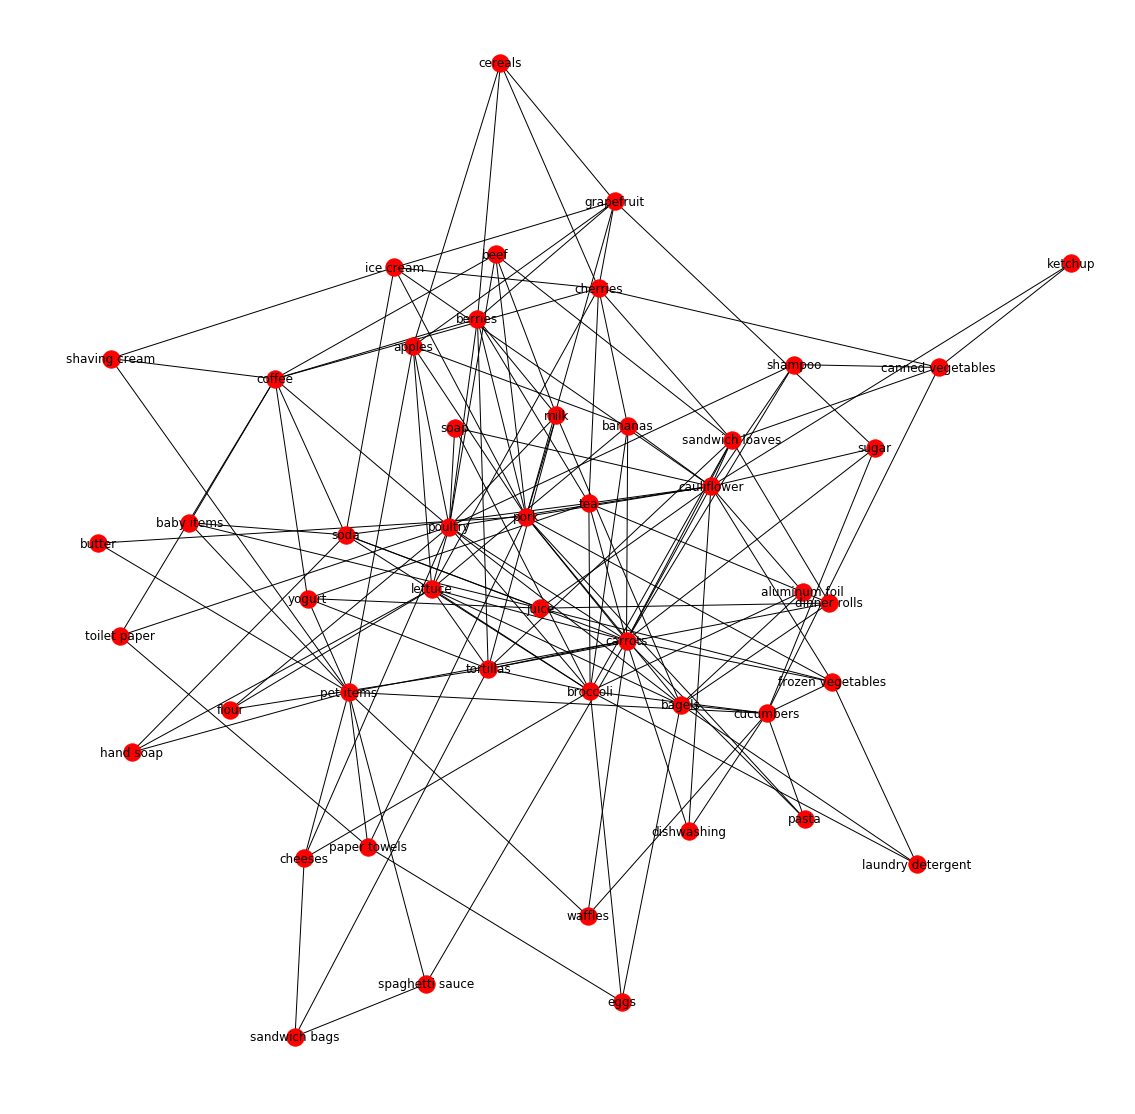

Clustering: {'pork': 0.14102564102564102, 'cereals': 0.5, 'bananas': 0.3333333333333333, 'dinner rolls': 0.1, 'tea': 0.10714285714285714, 'carrots': 0.13970588235294118, 'sandwich bags': 0, 'lettuce': 0.26666666666666666, 'spaghetti sauce': 0.3333333333333333, 'sandwich loaves': 0.17857142857142858, 'laundry detergent': 0, 'sugar': 0.16666666666666666, 'milk': 0.4666666666666667, 'ice cream': 0.2, 'cheeses': 0.16666666666666666, 'dishwashing': 0.3333333333333333, 'beef': 0.3, 'bagels': 0.08333333333333333, 'waffles': 0.6666666666666666, 'cherries': 0.1111111111111111, 'grapefruit': 0.3333333333333333, 'aluminum foil': 0, 'yogurt': 0, 'soap': 0.6666666666666666, 'butter': 0, 'coffee': 0.1111111111111111, 'cauliflower': 0.13333333333333333, 'flour': 0.6666666666666666, 'eggs': 0, 'pasta': 0.3333333333333333, 'pet items': 0.045454545454545456, 'shaving cream': 0, 'frozen vegetables': 0.26666666666666666, 'toilet paper': 0.3333333333333333, 'canned vegetables': 0.1, 'broccoli': 0.089743589

<Figure size 432x288 with 0 Axes>

In [3]:

import pandas as pd
from apyori import apriori
import networkx as nx
import re
import pickle 


# open the dictionary 

with open("tran_dict.txt", "rb") as myFile:
    tran_dict = pickle.load(myFile)
    
print("Graphing")
G = nx.Graph(tran_dict)
G.add_nodes_from(tran_dict.keys())
plt.figure(3,figsize=(15,15))
nx.draw(G, with_labels=True)
plt.show()
plt.savefig("Apriori_graph.png", dpi=100)
print('Clustering: %s' % nx.clustering(G))



In [4]:
# Trying to find the clustering coefficient for apriori
import pickle 
import networkx as nx

with open("tran_dict.txt", "rb") as myFile:
    tran_dict = pickle.load(myFile)
    

G = nx.Graph(tran_dict)
G.add_nodes_from(tran_dict.keys())

def clustering_coefficient(G,v):
    neighbors = G[v].keys()
    if len(neighbors) == 1: return -1.0
    links = 0
    for w in neighbors:
        for u in neighbors:
            if u in G[w]: links += 0.5
    return 2.0*links/(len(neighbors)*(len(neighbors)-1))

total = 0
for v in tran_dict.keys():
#     Instead of the taking the total, we can even print the coeff for each node. 
#     http://pythonfiddle.com/clustering-coefficient-algorithm/
    total += clustering_coefficient(G,v)

print(total/len(G))


0.198612291167


In [39]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from apyori import apriori
import networkx as nx
import re
import pickle 


# open the dictionary 

with open("tran_dict.txt", "rb") as myFile:
    tran_dict = pickle.load(myFile)

sub_graphs = nx.connected_component_subgraphs(G)
for i, sg in enumerate(sub_graphs):
    print("subgraph %s has %s nodes" % (i, sg.number_of_nodes()))
    print("Nodes:", sg.nodes(data=True))
    print('------------------------------------')
    print("Edges:", sg.edges())





subgraph 0 has 66 nodes
Nodes: [('pet items', {}), ('dinner rolls', {}), ('yogurt', {}), ('butter', {}), ('grapefruit', {}), ('bagels', {}), (" 'grapefruit'", {}), ('hand soap', {}), (" 'lettuce'", {}), ('beef', {}), ('ketchup', {}), ('cucumbers', {}), (" 'cauliflower'", {}), ('cherries', {}), ('milk', {}), ('sugar', {}), ('pork', {}), ('cauliflower', {}), (" 'cherries'", {}), ('toilet paper', {}), (" 'berries'", {}), ('sandwich bags', {}), ('paper towels', {}), (" 'juice'", {}), ('cereals', {}), (" 'canned vegetables'", {}), ('lettuce', {}), ('poultry', {}), (" 'poultry'", {}), (" 'dinner rolls'", {}), ('berries', {}), (" 'ice cream'", {}), ('canned vegetables', {}), ('sandwich loaves', {}), ('frozen vegetables', {}), ('waffles', {}), ('tortillas', {}), ('bananas', {}), (" 'pork'", {}), (" 'laundry detergent'", {}), ('pasta', {}), ('cheeses', {}), (" 'yogurt'", {}), (" 'cucumbers'", {}), ('soda', {}), (" 'sugar'", {}), (" 'carrots'", {}), (" 'eggs'", {}), ('carrots', {}), (" 'aluminum

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from apyori import apriori
import networkx as nx
import re
import pickle 
from networkx.algorithms import community

# open the dictionary 

with open("tran_dict.txt", "rb") as myFile:
    tran_dict = pickle.load(myFile)
#print('Subgraphs')

G = nx.Graph(tran_dict)
G.add_nodes_from(tran_dict.keys())
sub_graphs = nx.connected_component_subgraphs(G)


largest_cc = max(nx.connected_components(G), key=len)

    
print("Number of clusters:")
print(len(largest_cc))

print("The recommended clusters:")
for item in largest_cc:
    print (item)
    

print('-----Clustering Coefficients------')
print(nx.clustering(G))

print("--------With Communities------")
communities_generator = community.girvan_newman(G)
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)
print(sorted(map(sorted, next_level_communities)))

print('------Strongly Connected Components--------')
G = nx.DiGraph(tran_dict)
G.add_nodes_from(tran_dict.keys())
x = nx.strongly_connected_components(G)
y = ([n for n in x])
count = 1 
for item in y:
    print("%s: %s" %(count, item))
    count +=1 
print('-----Nearest Neighbors------')
G = nx.Graph(tran_dict)
G.add_nodes_from(tran_dict.keys())
x = nx.k_nearest_neighbors(G)
print(x)



Number of clusters:
48
The recommended clusters:
pork
cereals
bananas
dinner rolls
tea
carrots
sandwich bags
juice
spaghetti sauce
sandwich loaves
laundry detergent
sugar
milk
ice cream
cheeses
dishwashing
beef
bagels
waffles
cherries
grapefruit
aluminum foil
yogurt
canned vegetables
soap
poultry
coffee
cauliflower
flour
eggs
pet items
shaving cream
frozen vegetables
toilet paper
pasta
broccoli
ketchup
butter
paper towels
tortillas
lettuce
shampoo
hand soap
cucumbers
apples
soda
baby items
berries
-----Clustering Coefficients------
{'pork': 0.14102564102564102, 'cereals': 0.5, 'bananas': 0.3333333333333333, 'dinner rolls': 0.1, 'tea': 0.10714285714285714, 'carrots': 0.13970588235294118, 'sandwich bags': 0, 'lettuce': 0.26666666666666666, 'spaghetti sauce': 0.3333333333333333, 'sandwich loaves': 0.17857142857142858, 'laundry detergent': 0, 'sugar': 0.16666666666666666, 'milk': 0.4666666666666667, 'ice cream': 0.2, 'cheeses': 0.16666666666666666, 'dishwashing': 0.3333333333333333, 'beef'

### 3.2 K-mean clustering
Example: 

https://medium.com/@sotelo.d.a/categorization-a-fast-food-menu-using-k-means-clustering-30dccb56f660

http://datainquisitive.net/wp-content/uploads/2017/01/clustergrocery.html

Library: scikit-learn http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
import itertools
import re

from collections import Counter

from sklearn import metrics
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [42]:
#Read files
item=pd.read_csv('data/item_to_id.csv',index_col='Item_id')
purchase=pd.read_csv('data/purchase_history.csv')
item.replace(u'\xa0',u'', regex=True, inplace=True)

#purchase.head()
#purchase.user_id.value_counts()


In [43]:
#For each user, get item id and count
def item_counts(same_user_df):
    all_item = same_user_df['id'].str.split(',').sum()
    return pd.Series(Counter(int(id) 
    for id in all_item))

user_item_counts = purchase.groupby("user_id").apply(item_counts).unstack(fill_value=0)
user_item_counts.head()

,1,2,3,4,5,6,7,8,9,10,...,39,40,41,42,43,44,45,46,47,48
user_id,,,,,,,,,,,,,,,,,,,,,
47,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,0,0
68,0,0,0,0,0,1,0,0,0,1,...,1,0,0,1,0,0,0,0,0,0
113,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
123,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
223,1,1,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


In [44]:
#Normalize user_item_counts 
item_norm = normalize(user_item_counts.values, axis=0)
item_item_similarity = item_norm.T.dot(item_norm)
item_item_similarity = pd.DataFrame(item_item_similarity,index=user_item_counts.columns,columns=user_item_counts.columns)
item_item_similarity.head()


,1,2,3,4,5,6,7,8,9,10,...,39,40,41,42,43,44,45,46,47,48
1,1.000000,0.506895,0.420145,0.296986,0.271132,0.388250,0.271743,0.335303,0.403690,0.390641,...,0.388034,0.390286,0.358599,0.393056,0.395696,0.396766,0.390253,0.394998,0.392164,0.328221
2,0.506895,1.000000,0.466874,0.322744,0.285125,0.468199,0.312200,0.390521,0.464872,0.527894,...,0.462968,0.462548,0.409401,0.529100,0.464579,0.527325,0.521058,0.462407,0.460257,0.380077
3,0.420145,0.466874,1.000000,0.277325,0.224537,0.358326,0.238133,0.301868,0.362091,0.352597,...,0.351093,0.368199,0.309078,0.357794,0.351209,0.362522,0.361922,0.354933,0.351832,0.297972
4,0.296986,0.322744,0.277325,1.000000,0.162860,0.247414,0.166012,0.216166,0.252662,0.258313,...,0.245623,0.261272,0.210767,0.244946,0.253282,0.253119,0.250190,0.253835,0.260541,0.218717
5,0.271132,0.285125,0.224537,0.162860,1.000000,0.233618,0.164699,0.203245,0.239445,0.234254,...,0.235543,0.238557,0.211006,0.238466,0.235064,0.241835,0.238087,0.238247,0.232387,0.188269


In [45]:
#dimension reduction
pca = PCA()
items_pca = pca.fit_transform(item_item_similarity)
items_pca = pd.DataFrame(items_pca,index=user_item_counts.columns,columns=["pca{}".format(index+1) for index in range(item.shape[0])])
items_pca.head()

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,...,pca39,pca40,pca41,pca42,pca43,pca44,pca45,pca46,pca47,pca48
1,0.355639,-0.025103,-0.051129,-0.039214,-0.049529,0.003300,0.019830,-0.011458,0.084798,-0.042284,...,-0.019760,-0.012837,-0.006332,-0.022289,-0.002654,-0.001332,0.011263,-0.026911,-0.129284,9.369563e-17
2,0.793894,-0.041103,0.013244,-0.009035,-0.141627,-0.036540,-0.114816,-0.087070,0.000959,-0.035030,...,-0.039028,-0.015895,-0.027280,0.017406,0.013680,0.004437,-0.030161,0.006713,0.379136,9.369563e-17
3,0.135668,-0.029584,-0.028246,-0.012556,-0.013317,0.004220,-0.020503,-0.050246,0.177599,-0.080864,...,0.020455,-0.007168,0.040652,0.004387,0.029288,0.000224,0.009908,0.001288,-0.035429,9.369563e-17
4,-0.532034,0.020259,-0.022628,-0.037650,0.022756,-0.046219,0.042124,-0.132828,0.651482,-0.274771,...,0.000133,0.002444,0.005894,-0.003617,-0.005383,0.001555,-0.006114,0.007527,0.020217,9.369563e-17
5,-0.678770,-0.093874,-0.347623,-0.232866,-0.090366,-0.057124,-0.018074,0.038866,-0.048059,-0.014378,...,-0.008466,0.011890,0.002598,0.007605,0.009321,-0.003278,0.006540,0.000677,0.023603,9.369563e-17


In [46]:
explained_variance_by_k = pca.explained_variance_ratio_.cumsum()
# To plot clusters and items
def show_clusters(items_pca,labels):
    
    fig = plt.figure(figsize=(15, 15))
    colors =  itertools.cycle (["b","g","r","c","m","y","k"])
    color_names = ['blue','green','red','cyan','magenta','yellow','black']
    grps = items_pca.groupby(labels)
    print('\n')

    for label,grp in grps:
        
        print("*************** Cluster_no = ",label+1,' ******* color = ',color_names[label],'   *****************')
        plt.scatter(grp.pca1,grp.pca2,c=next(colors),label = label)

        names = item.loc[ grp.index,"Item_name"]
        cluster_groups=[]
        for index, name in enumerate(names):
            #print("\t{} {}".format(index+1,name))
            name_count=index+1
            cluster_groups.append(str(name_count)+'. '+name)
        print(cluster_groups)
        print('\n')
    for itemid in items_pca.index:
        x = items_pca.loc[itemid,"pca1"]
        y = items_pca.loc[itemid,"pca2"]
        name = item.loc[itemid,"Item_name"]
        name = re.sub('\W', ' ', name)

        plt.text(x,y,name)

In [47]:
# Clustering
def cluster(n_clusters,n_components=48):
    
    print("first {} PC explain {:.1f}% variances".format(n_components,
                                                         100 * sum(pca.explained_variance_ratio_[:n_components])))

    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(items_pca.values[:, :n_components])

    show_clusters(items_pca, kmeans.labels_)

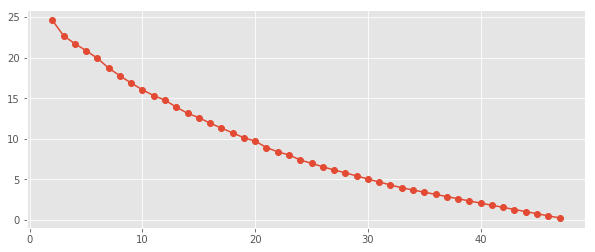

In [48]:
# Choose best K 
inertias = []
silhouettes = []

for k in range(2,48):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(items_pca)
    
    inertias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(items_pca, kmeans.predict(items_pca)))

ks=range(2,48)
fig = plt.figure(figsize=(10,4))
plt.plot(ks, inertias,marker='o')


first 48 PC explain 100.0% variances


*************** Cluster_no =  1  ******* color =  blue    *****************
['1. laundry detergent', '2. dishwashing']


*************** Cluster_no =  2  ******* color =  green    *****************
['1. sugar', '2. lettuce', '3. poultry', '4. soda', '5. carrots', '6. bagels', '7. beef', '8. grapefruit', '9. tea', '10. cherries', '11. apples', '12. tortillas', '13. dinner rolls', '14. juice', '15. sandwich loaves', '16. berries', '17. cucumbers', '18. coffee', '19. broccoli', '20. cauliflower', '21. bananas', '22. pork']


*************** Cluster_no =  3  ******* color =  red    *****************
['1. baby items', '2. shampoo', '3. shaving cream', '4. hand soap', '5. soap']


*************** Cluster_no =  4  ******* color =  cyan    *****************
['1. sandwich bags', '2. aluminum foil', '3. paper towels', '4. toilet paper']


*************** Cluster_no =  5  ******* color =  magenta    *****************
['1. waffles', '2. cereals', '3. flour', 

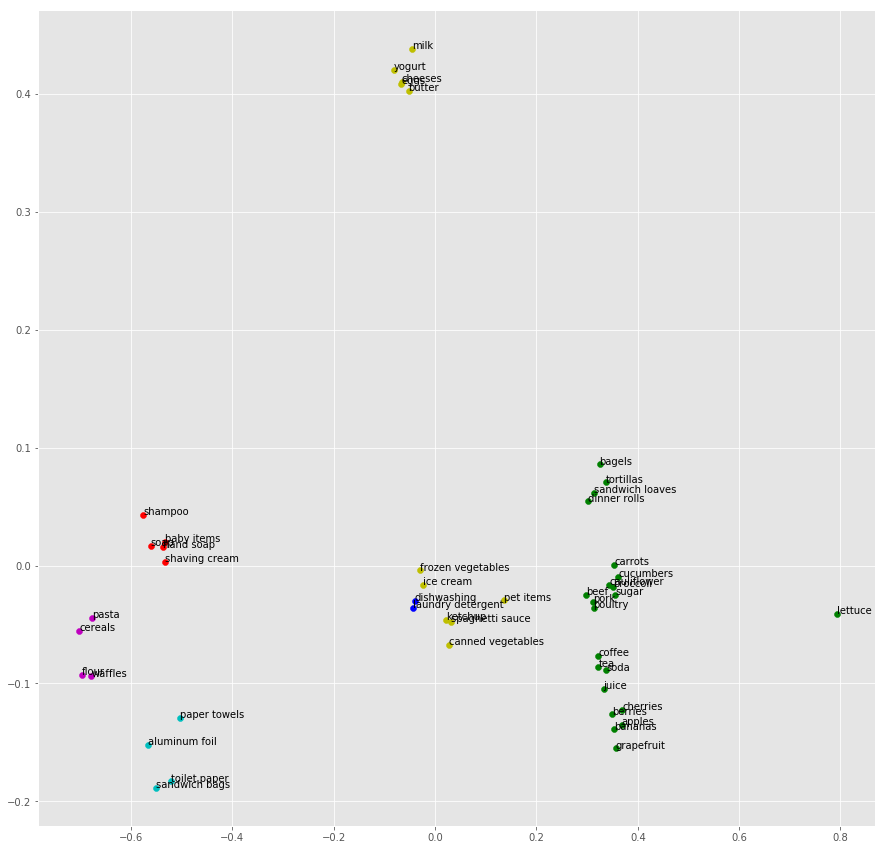

In [49]:
x=cluster(n_clusters=6)


In [50]:
x

### 3.3 Hierarchial clustering

Example: http://datainquisitive.net/wp-content/uploads/2017/01/clustergrocery.html

Library: scikit-learn
https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/

In [51]:
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
from sklearn.cluster import MeanShift
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
import seaborn as sns
import itertools
import re

from collections import Counter

from sklearn import metrics
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline



In [52]:
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
from sklearn.cluster import MeanShift
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
from mpl_toolkits.mplot3d import Axes3D
import scipy.cluster.hierarchy as shc



In [53]:
#Read files
item=pd.read_csv('data/item_to_id.csv',index_col='Item_id')
purchase=pd.read_csv('data/purchase_history.csv')
item.replace(u'\xa0',u'', regex=True, inplace=True)

#purchase.head()
#purchase.user_id.value_counts()


#For each user, get item id and count
def item_counts(same_user_df):
    all_item = same_user_df['id'].str.split(',').sum()
    return pd.Series(Counter(int(id) 
    for id in all_item))

user_item_counts = purchase.groupby("user_id").apply(item_counts).unstack(fill_value=0)
user_item_counts.head()


#Normalize user_item_counts 
item_norm = normalize(user_item_counts.values, axis=0)
item_item_similarity = item_norm.T.dot(item_norm)
item_item_similarity = pd.DataFrame(item_item_similarity,index=user_item_counts.columns,columns=user_item_counts.columns)
item_item_similarity.head()

#dimension reduction
pca = PCA()
items_pca = pca.fit_transform(item_item_similarity)
items_pca = pd.DataFrame(items_pca,index=user_item_counts.columns,columns=["pca{}".format(index+1) for index in range(item.shape[0])])
items_pca.head()

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,...,pca39,pca40,pca41,pca42,pca43,pca44,pca45,pca46,pca47,pca48
1,0.355639,-0.025103,-0.051129,-0.039214,-0.049529,0.003300,0.019830,-0.011458,0.084798,-0.042284,...,-0.019760,-0.012837,-0.006332,-0.022289,-0.002654,-0.001332,0.011263,-0.026911,-0.129284,9.369563e-17
2,0.793894,-0.041103,0.013244,-0.009035,-0.141627,-0.036540,-0.114816,-0.087070,0.000959,-0.035030,...,-0.039028,-0.015895,-0.027280,0.017406,0.013680,0.004437,-0.030161,0.006713,0.379136,9.369563e-17
3,0.135668,-0.029584,-0.028246,-0.012556,-0.013317,0.004220,-0.020503,-0.050246,0.177599,-0.080864,...,0.020455,-0.007168,0.040652,0.004387,0.029288,0.000224,0.009908,0.001288,-0.035429,9.369563e-17
4,-0.532034,0.020259,-0.022628,-0.037650,0.022756,-0.046219,0.042124,-0.132828,0.651482,-0.274771,...,0.000133,0.002444,0.005894,-0.003617,-0.005383,0.001555,-0.006114,0.007527,0.020217,9.369563e-17
5,-0.678770,-0.093874,-0.347623,-0.232866,-0.090366,-0.057124,-0.018074,0.038866,-0.048059,-0.014378,...,-0.008466,0.011890,0.002598,0.007605,0.009321,-0.003278,0.006540,0.000677,0.023603,9.369563e-17


In [54]:


explained_variance_by_hierarchical = pca.explained_variance_ratio_.cumsum()
# To plot clusters and items
def show_clusters(items_pca,labels):
    
    fig = plt.figure(figsize=(15, 15))
    colors =  itertools.cycle (["b","g","r","c","m","y","k"])
    color_names = ['blue','green','red','cyan','magenta','yellow','black']
    grps = items_pca.groupby(labels)
    print('\n')

    for label,grp in grps:
        
        print("*************** Cluster_no = ",label+1,' ******* color = ',color_names[label],'   *****************')
        plt.scatter(grp.pca1,grp.pca2,c=next(colors),label = label)

        names = item.loc[ grp.index,"Item_name"]
        cluster_groups=[]
        for index, name in enumerate(names):
            #print("\t{} {}".format(index+1,name))
            name_count=index+1
            cluster_groups.append(str(name_count)+'. '+name)
        print(cluster_groups)
        print('\n')
    for itemid in items_pca.index:
        x = items_pca.loc[itemid,"pca1"]
        y = items_pca.loc[itemid,"pca2"]
        name = item.loc[itemid,"Item_name"]
        name = re.sub('\W', ' ', name)

        plt.text(x,y,name)



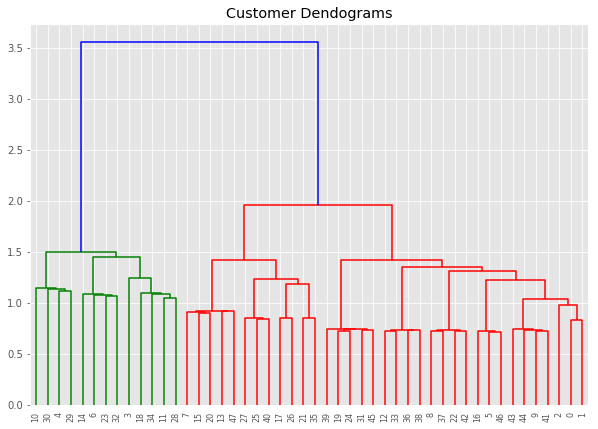

In [55]:


plt.figure(figsize=(10, 7))  
plt.title("Customer Dendograms")  
dend = shc.dendrogram(shc.linkage(items_pca, method='ward'))  





*************** Cluster_no =  1  ******* color =  blue    *****************
['1. sugar', '2. lettuce', '3. pet items', '4. poultry', '5. soda', '6. carrots', '7. bagels', '8. beef', '9. tea', '10. tortillas', '11. dinner rolls', '12. juice', '13. sandwich loaves', '14. cucumbers', '15. coffee', '16. broccoli', '17. cauliflower', '18. pork']


*************** Cluster_no =  2  ******* color =  green    *****************
['1. baby items', '2. shampoo', '3. shaving cream', '4. hand soap', '5. soap']


*************** Cluster_no =  3  ******* color =  red    *****************
['1. laundry detergent', '2. frozen vegetables', '3. spaghetti sauce', '4. dishwashing', '5. canned vegetables', '6. ice cream', '7. ketchup']


*************** Cluster_no =  4  ******* color =  cyan    *****************
['1. waffles', '2. cereals', '3. flour', '4. pasta']


*************** Cluster_no =  5  ******* color =  magenta    *****************
['1. sandwich bags', '2. aluminum foil', '3. paper towels', '4. t

<Figure size 1080x1080 with 0 Axes>

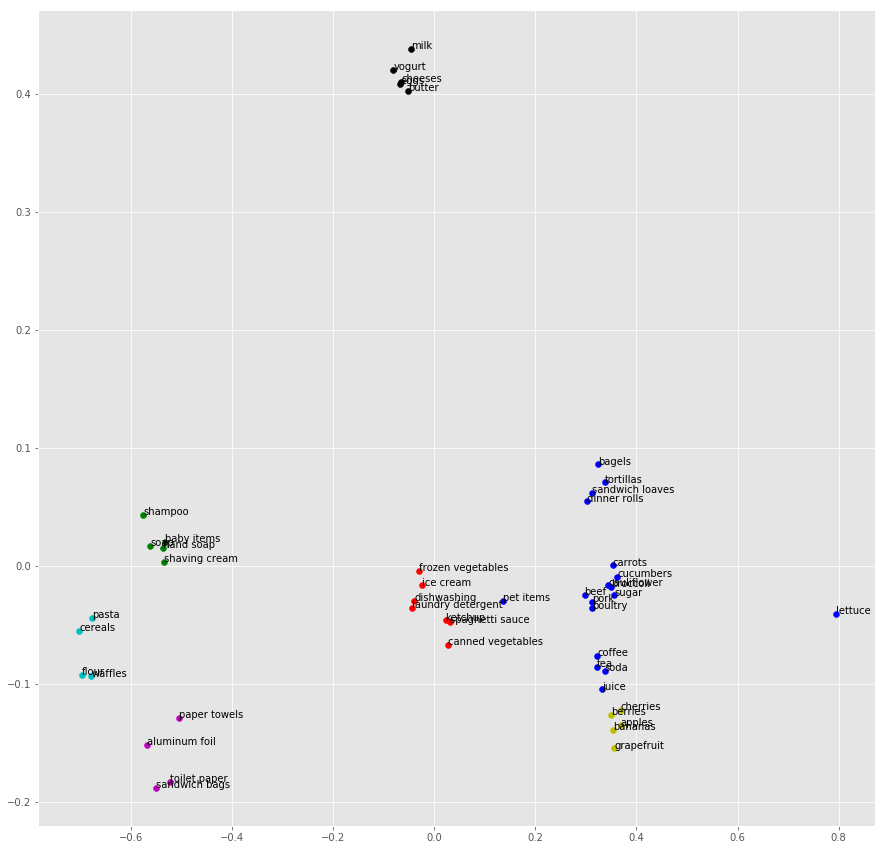

In [56]:

from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters= 7, affinity='euclidean', linkage='ward')  
cluster.fit_predict(items_pca)  


plt.figure(figsize=(15, 15))  
show_clusters(items_pca, cluster.labels_)